#Import libraries

In [1]:
!pip install pmdarima

     |████████████████████████████████| 1.5MB 7.1MB/s 
     |████████████████████████████████| 9.5MB 27.8MB/s 
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [2]:
from matplotlib import pyplot as plt
import numpy as np
import os
import pandas as pd
from pylab import rcParams
rcParams['figure.figsize'] = (23, 8)
from scipy.stats import f_oneway
import seaborn as sns
from sklearn import datasets
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
sns.set_style('whitegrid')
plt.style.use('seaborn-whitegrid')
from sklearn.preprocessing import LabelEncoder

from statsmodels.tsa.stattools import adfuller
import requests
import warnings
import itertools
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import kpss
import io
import scipy
import pandas_datareader as pdr
from pandas_datareader import data, wb
import fix_yahoo_finance as yf

from matplotlib.pyplot import plot
from matplotlib.pyplot import figure
from matplotlib.pyplot import style
import matplotlib.ticker as mtick
import datetime
from datetime import date
from dateutil.parser import parse
#from pyramid.arima import auto_arima
plt.rcParams["figure.figsize"] = (16,12)
import plotly.express as px
from datetime import datetime
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
import warnings
warnings.filterwarnings('ignore')
import pmdarima as pm
%matplotlib inline

#Acquiring dataset

In [3]:
data_path = "https://docs.google.com/spreadsheets/d/e/2PACX-1vR_N1eTRKgAmUQ92MOo4XcKZIZPq4YjL5xzXYat-cNbFutUE-eVPx72uwBJT0JjAV5EFuuAs8ev1N4i/pub?gid=1373632861&single=true&output=csv"
df= pd.read_csv(data_path,index_col="ID")
df.shape

(18249, 13)

In [4]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
ID,,,,,,,,,,,,,
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


#Data Description:

The data has 13 columns:


**Date** - The date of the observation

**AveragePrice** - the average price of a single avocado

**type** - Avocado type for here: Conventional , or Organic

**year** - the year of observation

**Region** - the city or region of the observation

**Total Volume** - Total number of avocados sold

**4046** - Total number of avocados with PLU 4046 sold

**4225** - Total number of avocados with PLU 4225 sold

**4770** - Total number of avocados with PLU 4770 sold

**Total bags**- Total number of avocado bags sold. 

**Small bags**- Total number of small bags sold.

**Large bags**- Total number of large bags sold.

**XLarge bags**- Total number of Extra large bags sold.

#Describing quantitative data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18249 entries, 0 to 11
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.9+ MB


In [6]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


#Checking missing value

* There are no missing values in the dataset.

In [7]:
df.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

* We have two columns which are 'Date' and 'year'. year, month and day are extracted from 'Date' for better analysis.

In [8]:
df['Date'] = df['Date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day
df['day of week'] = df['Date'].dt.dayofweek
dates = ['year', 'month', 'day', 'day of week']
df[dates]

,year,month,day,day of week
ID,,,,
0,2015,12,27,6
1,2015,12,20,6
2,2015,12,13,6
3,2015,12,6,6
4,2015,11,29,6
...,...,...,...,...
7,2018,2,4,6
8,2018,1,28,6
9,2018,1,21,6


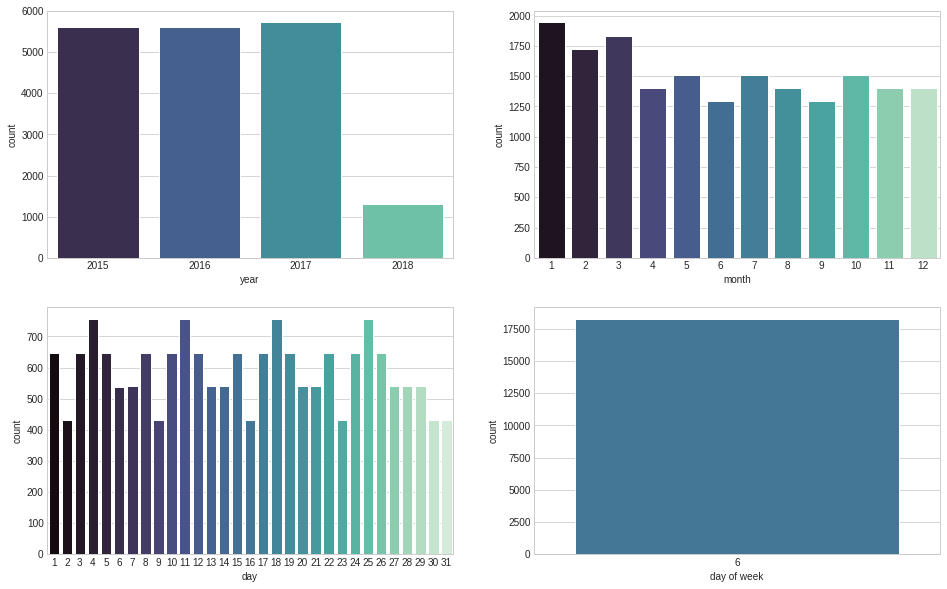

In [9]:
fig, ax = plt.subplots(2,2, figsize=(16,10))

sns.countplot('year', data=df, ax=ax[0,0], palette='mako')
sns.countplot('month', data=df, ax=ax[0,1], palette='mako')
sns.countplot('day', data=df, ax=ax[1,0], palette='mako')
sns.countplot('day of week', data=df, ax=ax[1,1], palette='mako')

plt.show()

**Year:**

* 2015, 2016, 2017 have almost similar values.

* 2018 was the lowest, it could be because the dataset might not contain the data of the whole year.

**month:**

* Shows a descending pattern,it could be because of the same reason as year: 2018 has only intial month entries in the dataset.


# Exploratory Data Analysis

Correlation Analysis:

* The correlation is showing the relationship between different variables.

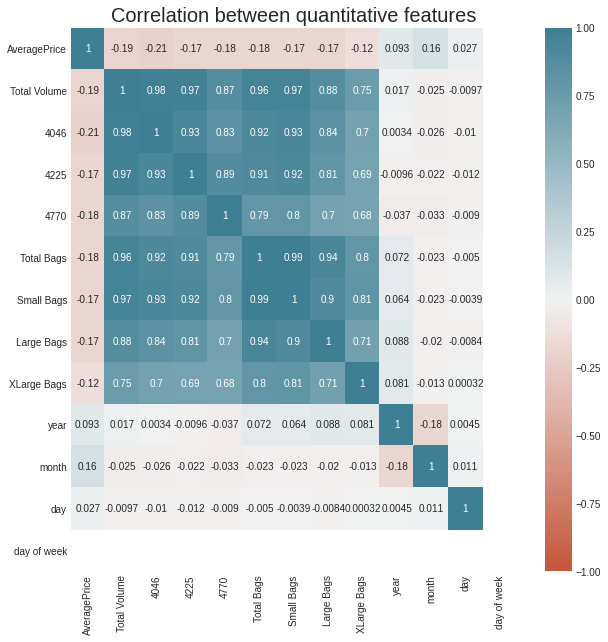

In [10]:
f,ax=plt.subplots(figsize=(10,10))

ax= sns.heatmap(df.corr(), vmin=-1, vmax=1, cmap=sns.diverging_palette(20, 220, as_cmap=True), annot=True)
plt.title('Correlation between quantitative features', fontsize=20)

plt.show()

* The heatmap shows that Total volume has strong relationship with PLU numbers and size of bags. 

* We are going to take the strongest relationship out of total volume and average price to do further analysis.


The graph represents the count of conventional and organic avocados. Conventional avocado has more count than organic avocados.

conventional    9126
organic         9123
Name: type, dtype: int64


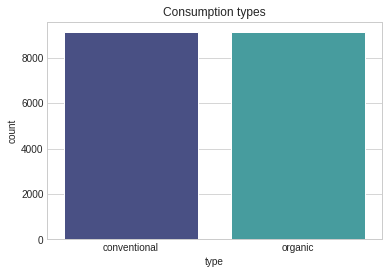

In [11]:
print(df['type'].value_counts())
sns.countplot('type', data=df, palette='mako')
plt.title('Consumption types')
plt.show()

* Checking the unique values in variable - region

In [12]:
print(df['region'].value_counts())
print('\n', 'There are:', len(df['region'].unique()), 'unique values in the feature')

Plains                 338
SouthCentral           338
Louisville             338
CincinnatiDayton       338
SanDiego               338
Detroit                338
Columbus               338
BuffaloRochester       338
LosAngeles             338
Houston                338
Nashville              338
StLouis                338
Portland               338
Syracuse               338
SouthCarolina          338
West                   338
HartfordSpringfield    338
RichmondNorfolk        338
MiamiFtLauderdale      338
HarrisburgScranton     338
Northeast              338
Tampa                  338
Sacramento             338
Roanoke                338
Charlotte              338
Indianapolis           338
Boise                  338
BaltimoreWashington    338
Chicago                338
Spokane                338
Philadelphia           338
RaleighGreensboro      338
Atlanta                338
Jacksonville           338
NewYork                338
LasVegas               338
Albany                 338
B

#Which region sold more Avocados?

In [13]:
sales_by_region = df.groupby('region')['Total Volume'].sum().reset_index()
sales_by_region = sales_by_region.sort_values('Total Volume',ascending=False)

top_10 = sales_by_region[:11]
top_10

,region,Total Volume
51,TotalUS,5.864740e+09
52,West,1.086779e+09
6,California,1.028982e+09
45,SouthCentral,1.011280e+09
29,Northeast,7.132809e+08
46,Southeast,6.152384e+08
15,GreatLakes,5.896425e+08
25,Midsouth,5.083494e+08
22,LosAngeles,5.078965e+08
35,Plains,3.111885e+08


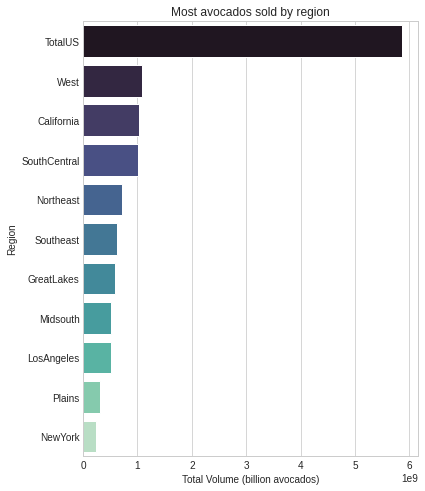

In [14]:
#Before feedback (classmate feedback " graphical representation without TotalUS")
plt.figure(figsize=(6,8))

sns.barplot(x='Total Volume', y='region', orient='h', data=top_10, palette='mako')

# Let's visualize the total number of avocados sold within the US between 2015 and 2018

plt.title('Most avocados sold by region')
plt.ylabel('Region')
plt.xlabel('Total Volume (billion avocados)')

plt.show()

Looks like avocados are more popular in the following regions of USA - West, California, SouthCentral, Northeast, Southeast.

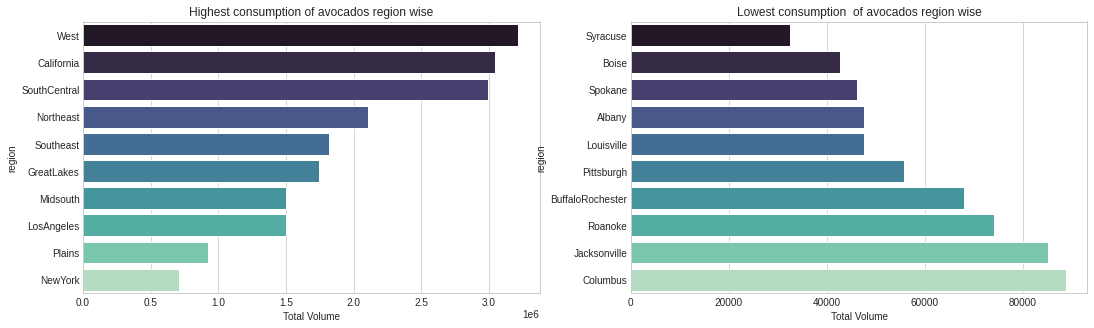

States with the the highest demand are ['West', 'California', 'SouthCentral', 'Northeast', 'Southeast'] 
States with the lowest demand are ['Syracuse', 'Boise', 'Spokane', 'Albany', 'Louisville'] 


In [15]:
#After feedback
fig, ax = plt.subplots(1, 2, figsize=(18,5))

avoStates = df[df['region'] !='TotalUS']

regionV = avoStates.groupby('region')['Total Volume'].sum()

most = regionV.sort_values(ascending = False).iloc[:10]
least = regionV.sort_values().iloc[:10]

sns.barplot(x='Total Volume', y='region', data = avoStates, order=most.index, ci=None, palette='mako', ax=ax[0])
sns.barplot(x='Total Volume', y='region', data = avoStates, order=least.index, ci=None, palette='mako', ax=ax[1])
ax[0].set_title('Highest consumption of avocados region wise')
ax[1].set_title('Lowest consumption  of avocados region wise')
plt.show()

most = pd.DataFrame(most).reset_index()
least = pd.DataFrame(least).reset_index()

print('States with the the highest demand are {} '.format(list(most.iloc[:5,0])))
print('States with the lowest demand are {} '.format(list(least.iloc[:5,0])))

From the above graph can determine that the highest, lowest sales of avocados. 
Zones are not further eliminated because the data is recorded in the mixed zone factor and there is no further information to check whether the data region is based on the city, based on the state. Therefore, only the total record is deleted.


#Comparison of avocado prices with the consumption type



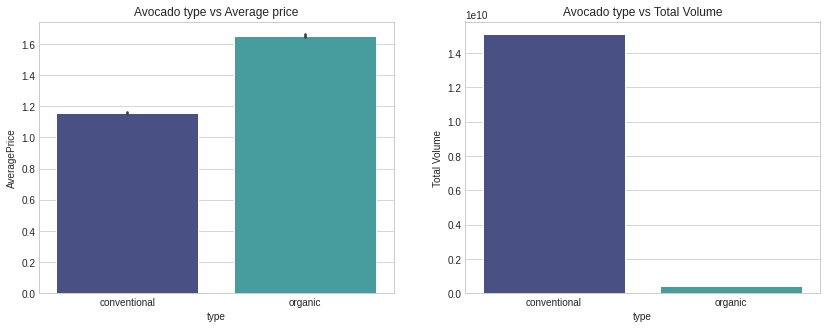

type
conventional    1.158040
organic         1.653999
Name: AveragePrice, dtype: float64

type
conventional    1.653213e+06
organic         4.781121e+04
Name: Total Volume, dtype: float64

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(14,5))

sns.barplot(x='type', y='AveragePrice', data=df, palette='mako', ax=ax[0])
ax[0].set_title('Avocado type vs Average price')

sns.barplot(x='type', y='Total Volume', data=df, palette='mako', ax=ax[1], estimator=sum, ci=None)
ax[1].set_title('Avocado type vs Total Volume')
plt.show()

display(df.groupby('type')['AveragePrice'].mean())
display(df.groupby('type')['Total Volume'].mean())

#Which type of Avocados were more consumed?


In [17]:
#Before feedback (" avocados sizes to present in different colors ")
fig = px.scatter(df, x='AveragePrice', y='Total Bags',
                 color='type') # Added color to previous basic 
fig.update_layout(title='Average Price Vs Volume with Avocado Type ',xaxis_title="Price",yaxis_title="Volume")
fig.show()

* Clearly conventional avocados are consumed more than organic with around 1-1.125 USD average price. 

* Prices of organic avocados over conventional avocados are high, but their total volume is lower. This can be the reason why people prefer conventional over organic avocados.


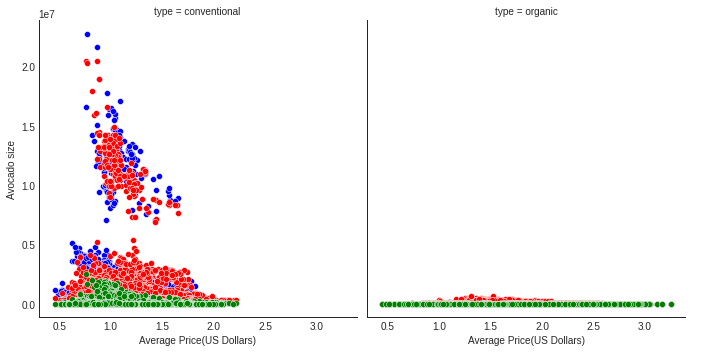

In [18]:
#After feedback
#4046 is PLU code for small Avocado
#4225 is PLU code for Large Avocado
#4770 is PLU code for XLarge Avocado
with sns.axes_style('white'):
    g = sns.FacetGrid(df, col='type', margin_titles=True, height=5)
g.map(sns.scatterplot, 'AveragePrice', '4046', color='blue')
g.map(sns.scatterplot, 'AveragePrice', '4225', color='red')
g.map(sns.scatterplot, 'AveragePrice', '4770', color='green')
g.set_axis_labels('Average Price(US Dollars)', 'Avocado size')
g.add_legend()

From the above graph we can see that in conventional avocado the major sale is of 4046(small) and 4225 (large) avocado. Also, the sale of 4770 is quite less. 

Ironically, It  was observed that small size avocados were not sold in organic.

#Which quarter can we find cheaper avocados? 



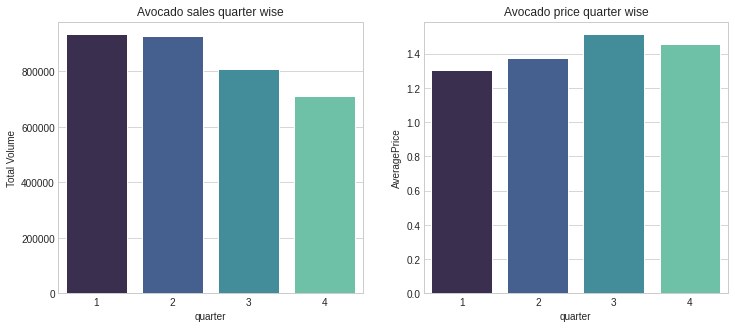

,Total Volume,AveragePrice
quarter,,
1,933371.788252,1.306605
2,928527.872254,1.375033
3,808062.047498,1.512913
4,710750.427752,1.458588


In [19]:
fig, ax = plt.subplots(1, 2, figsize=(12,5))

df['quarter'] = df['Date'].dt.quarter

sns.barplot(x='quarter', y='Total Volume', data=df, palette='mako', ci=None, ax=ax[0])
sns.barplot(x='quarter', y='AveragePrice', data=df, palette='mako', ci=None, ax=ax[1])
ax[0].set_title('Avocado sales quarter wise')
ax[1].set_title('Avocado price quarter wise')
plt.show()

quarter = df.groupby('quarter')[['Total Volume', 'AveragePrice']].mean()
display(quarter)

* From the above plot, so we see that the sales in the first quarter of the year were better than the remaining 3 quarters, but the trend in prices seems to have increased when the supply got decreased.

* After the first quarter, sales got decreased and price got increased. Given the popularity of avocados, businesses should be considering importing more avocados when they are not produced in the country.

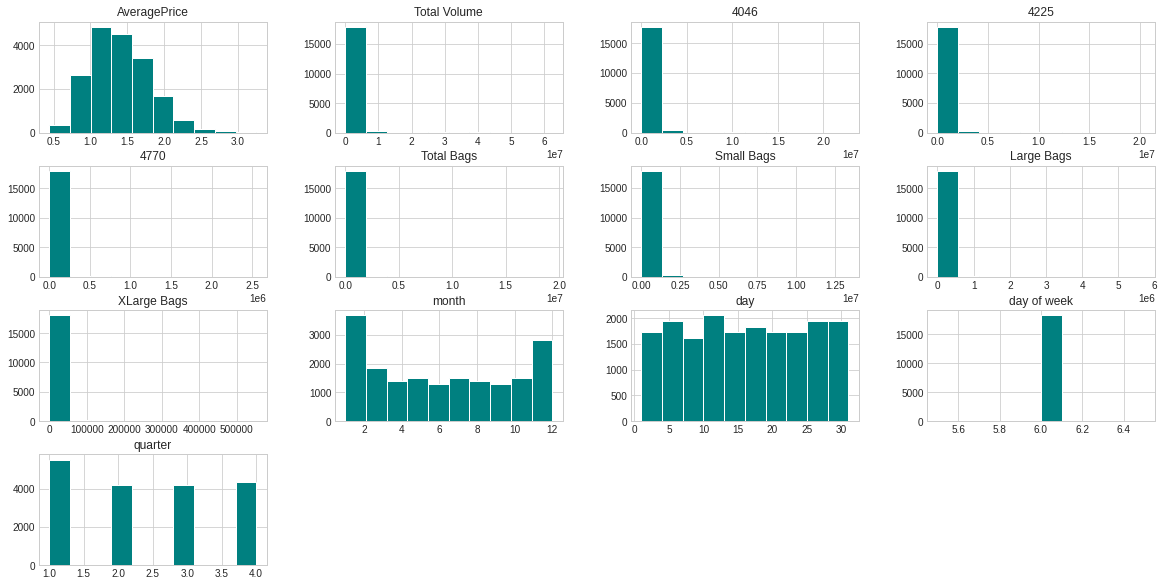

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,month,day,day of week,quarter
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249.000000,18249.0,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,6.177215,15.662612,6.0,2.402323
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,3.534130,8.776281,0.0,1.147834
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,1.000000,1.000000,6.0,1.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,3.000000,8.000000,6.0,1.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,6.000000,16.000000,6.0,2.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,9.000000,23.000000,6.0,3.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,12.000000,31.000000,6.0,4.000000


In [20]:
numbers = list(df.select_dtypes(['float64', 'int64']).keys())

# removing years
numbers.remove('year')

df[numbers].hist(figsize=(20,10), color='teal', edgecolor='white')

plt.show()

display(df[numbers].describe())

**AveragePrice:**

* Average price has almost normal distribution. Because mean is greater than median, it shows positive skewed,which means the distribution is not severly influenced by outliers.

**Remaining features**

* The remaining features are severely influenced by outliers, most of the values are located in the first bin of the histograms and the mean is way greater than the median.

* Lets remove the outliers out of the quantiles to see if we can find a more normal distribution.

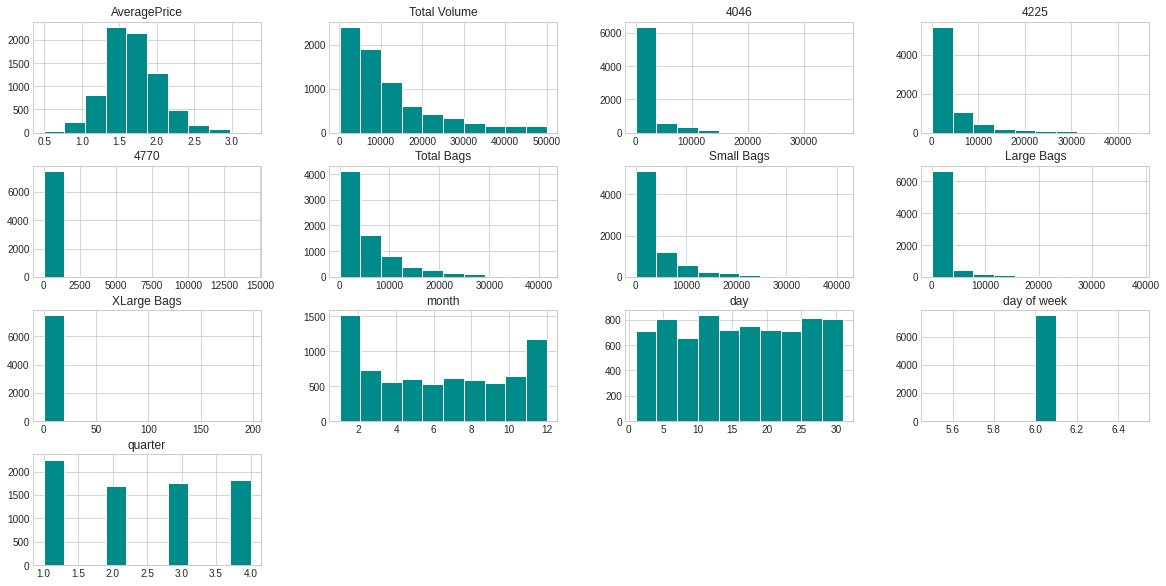

In [21]:
df2 = df[df['Total Volume']<50000]
df2[numbers].hist(figsize=(20,10), color='darkcyan', edgecolor='white')

plt.show()

* By removing the outliers we can see normal distribution in average price and positive skews in other variables like total volume.

* These kinds of distributions, where most of the values are located in lower values and then descends is really common and could be represented in a different way through log formulas to make it more normal and useful for a model, like regression models, without getting rid of outliers.

An example below with Total Volume.

Text(0.5, 1.0, 'Distribution of Total volume')

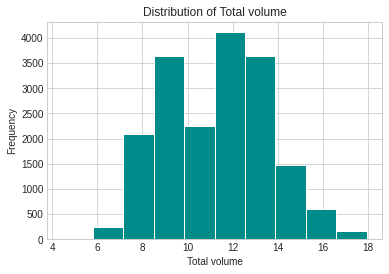

In [22]:
TotalLog = np.log(df['Total Volume'] + 1)
TotalLog.hist(color='darkcyan', edgecolor='white')
plt.xlabel('Total volume')
plt.ylabel('Frequency')
plt.title('Distribution of Total volume')

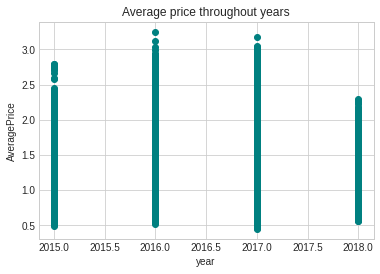

In [23]:
plt.scatter(df.year, df.AveragePrice,  color='teal')
plt.xlabel('year')
plt.ylabel('AveragePrice')
plt.title('Average price throughout years')
plt.show()

* The scatterplot between year and average price represents that the average price is highest in 2016 followed by 2017.

In [24]:
#Splitting the train and test data into different sizes with train data less than 80% and the remaining as test data.
msk = np.random.rand(len(df)) < 0.8
train = df[msk]
test = df[~msk]

* Representing the relationship between train average price and year. 

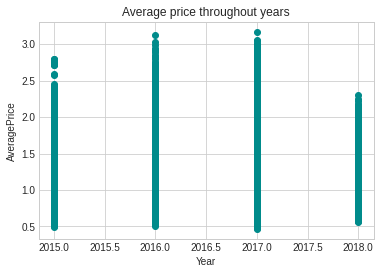

In [25]:
plt.scatter(train.year, train.AveragePrice,  color='darkcyan')
plt.xlabel('Year')
plt.ylabel('AveragePrice')
plt.title('Average price throughout years')
plt.show()

* From the above graph we can determine that the average price is highest in  2016 even for the train data.

* Converting the type variable into binary using label encoder where 0 is conventional and 1 is organic.

In [26]:
LabelEncoder=LabelEncoder()
df['type']=LabelEncoder.fit_transform(df['type'])
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month,day,day of week,quarter
ID,,,,,,,,,,,,,,,,,
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,Albany,12,27,6,4
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,Albany,12,20,6,4
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,Albany,12,13,6,4
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,Albany,12,6,6,4
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,Albany,11,29,6,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018,WestTexNewMexico,2,4,6,1
8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018,WestTexNewMexico,1,28,6,1
9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018,WestTexNewMexico,1,21,6,1


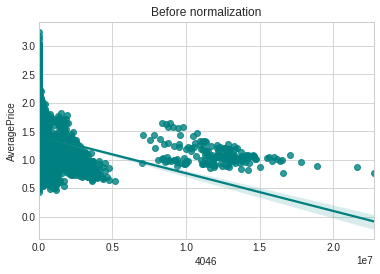

In [27]:
sns.regplot(x='4046', y='AveragePrice', data=df, color='teal')
plt.title('Before normalization')
plt.show()

# Normalizing the data

* From the previous analysis it shows removing outliers doesn't show effective results hence we are normalizing the data,let's normalize the AveragePrice and 4046.

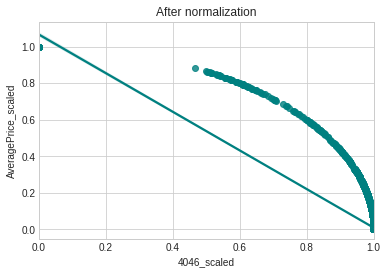

In [28]:
scaler = Normalizer()
scaler.fit(df[['4046', 'AveragePrice']].values)
df['4046_scaled'] = scaler.transform(df[['4046', 'AveragePrice']].values)[:,0]
df['AveragePrice_scaled'] = scaler.transform(df[['4046', 'AveragePrice']].values)[:,1]

sns.regplot(x='4046_scaled', y='AveragePrice_scaled', data=df, color='teal')
plt.title('After normalization')
plt.show()

* Because of clear tendency we can say that regression is possible.

# Linear regression

In [29]:
df_model = df.drop(['Date','year', 'type', 'region'], axis=1)
target = df_model['AveragePrice']
features = df_model.drop(['AveragePrice'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(features.values, target.values, random_state=0)

In [30]:
lr = LinearRegression().fit(X_train, y_train)
print('Linear Regression')
print("training set score : {:.2f}".format(lr.score(X_train, y_train)))
print("test set score: {:.2f}".format(lr.score(X_test, y_test)))

print('Ridge')
ridge = Ridge().fit(X_train, y_train)
print("\n", "training set score : {:.2f}".format(ridge.score(X_train, y_train)))
print("test set score: {:.2f}".format(ridge.score(X_test, y_test)))

print('Lasso')
lasso = Lasso().fit(X_train, y_train)
print("\n", "training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used:", np.sum(lasso.coef_ != 0))

Linear Regression
training set score : 0.11
test set score: 0.10
Ridge

 training set score : 0.11
test set score: 0.10
Lasso

 training set score: 0.05
Test set score: 0.05
Number of features used: 8


* Our model performs quite bad with the given features. From previous sections, we know that a better way to represent the volume data is applying a log formula or a normalizer. let's try both methods and see if we can get a better prediciton.

# Implementing log

In [31]:
df_model = df.drop(['Date', 'year', 'type', 'region'], axis=1)
target = df_model['AveragePrice']
features = df_model.drop(['AveragePrice'], axis=1)

features.iloc[:,0:7] = np.log(features.iloc[:,0:7] + 1)
X_train, X_test, y_train, y_test = train_test_split(features.values, target.values, random_state=0)

lr = LinearRegression().fit(X_train, y_train)
print('Linear Regression')
print("training set score : {:.2f}".format(lr.score(X_train, y_train)))
print("test set score: {:.2f}".format(lr.score(X_test, y_test)))

print('Ridge')
ridge = Ridge().fit(X_train, y_train)
print("\n", "training set score : {:.2f}".format(ridge.score(X_train, y_train)))
print("test set score: {:.2f}".format(ridge.score(X_test, y_test)))

print('Lasso')
lasso = Lasso().fit(X_train, y_train)
print("\n", "training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used:", np.sum(lasso.coef_ != 0))

Linear Regression
training set score : 0.45
test set score: 0.44
Ridge

 training set score : 0.45
test set score: 0.44
Lasso

 training set score: 0.01
Test set score: 0.01
Number of features used: 1


* To re-examine we are adding dummy variables.



In [32]:
df_model = df.drop(['Date','year'], axis=1)
df_model = pd.get_dummies(df_model)

target = df_model['AveragePrice']
features = df_model.drop(['AveragePrice'], axis=1)

features.iloc[:,0:7] = np.log(features.iloc[:,0:7] + 1)
X_train, X_test, y_train, y_test = train_test_split(features.values, target.values, random_state=0)

lr = LinearRegression().fit(X_train, y_train)
print('Linear Regression')
print("training set score : {:.2f}".format(lr.score(X_train, y_train)))
print("test set score: {:.2f}".format(lr.score(X_test, y_test)))

print('Ridge')
ridge = Ridge().fit(X_train, y_train)
print("\n", "training set score : {:.2f}".format(ridge.score(X_train, y_train)))
print("test set score: {:.2f}".format(ridge.score(X_test, y_test)))

print('Lasso')
lasso = Lasso().fit(X_train, y_train)
print("\n", "training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used:", np.sum(lasso.coef_ != 0))

Linear Regression
training set score : 0.66
test set score: 0.64
Ridge

 training set score : 0.66
test set score: 0.64
Lasso

 training set score: 0.01
Test set score: 0.01
Number of features used: 1


* After implementing log we can clearly see the improvement in the test score and unfortunately there is no change in the Lasso test score. 

# Time Series - Price

In [33]:
#extract useful columns from data set
df1= pd.DataFrame(columns=['Date', 'AveragePrice','type'])
df1['Date']=df['Date']
df1['AveragePrice']=df['AveragePrice']
df1['type']=df['type']
df1.head()

,Date,AveragePrice,type
ID,,,
0,2015-12-27,1.33,0
1,2015-12-20,1.35,0
2,2015-12-13,0.93,0
3,2015-12-06,1.08,0
4,2015-11-29,1.28,0


In [34]:
df1['Date'] = pd.to_datetime(df1['Date'], format = '%Y-%m-%d')

In [35]:
#divide data set by type
conv=df1[df1['type']==0]
org=df1[df1['type']==1]

#Conventional Avocado Price Forcasting

In [36]:
#add time index
conv=conv.set_index('Date')
conv.sort_index(inplace= True)

In [37]:
#no need type colunm
conv=conv.drop(columns='type')
conv.head()


,AveragePrice
Date,
2015-01-04,0.93
2015-01-04,1.10
2015-01-04,0.98
2015-01-04,1.40
2015-01-04,0.80


In [38]:
#Average all region's weekly average price
conv= pd.DataFrame(data=conv['AveragePrice'].groupby('Date').mean(), columns=['AveragePrice'])
conv.head()


,AveragePrice
Date,
2015-01-04,1.009630
2015-01-11,1.111296
2015-01-18,1.133519
2015-01-25,1.115370
2015-02-01,0.962037


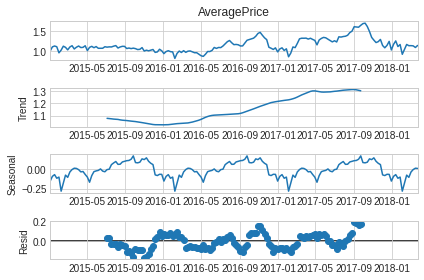

In [39]:
res = sm.tsa.seasonal_decompose(conv.AveragePrice, model='additive')
resplot = res.plot()

In [40]:
#Checking Stationarity
#Plotting rolling means and variances
conv['z_data'] = (conv['AveragePrice'] - conv.AveragePrice.rolling(window=12).mean()) / conv.AveragePrice.rolling(window=12).std()
conv['zp_data'] = conv['z_data'] - conv['z_data'].shift(12)

def plot_rolling(df):
    fig, ax = plt.subplots(3,figsize=(12, 9))
    ax[0].plot(conv.index, conv.AveragePrice, label='raw data')
    ax[0].plot(conv.AveragePrice.rolling(window=12).mean(), label='rolling mean');
    ax[0].plot(conv.AveragePrice.rolling(window=12).std(), label='rolling std (x10)');
    ax[0].legend()

    ax[1].plot(conv.index, df.z_data, label='de-trended data')
    ax[1].plot(conv.z_data.rolling(window=12).mean(), label='rolling mean');
    ax[1].plot(conv.z_data.rolling(window=12).std(), label='rolling std (x10)');
    ax[1].legend()

    ax[2].plot(conv.index, df.zp_data, label='12 lag differenced de-trended data')
    ax[2].plot(conv.zp_data.rolling(window=12).mean(), label='rolling mean');
    ax[2].plot(conv.zp_data.rolling(window=12).std(), label='rolling std (x10)');
    ax[2].legend()

    plt.tight_layout()
    fig.autofmt_xdate()

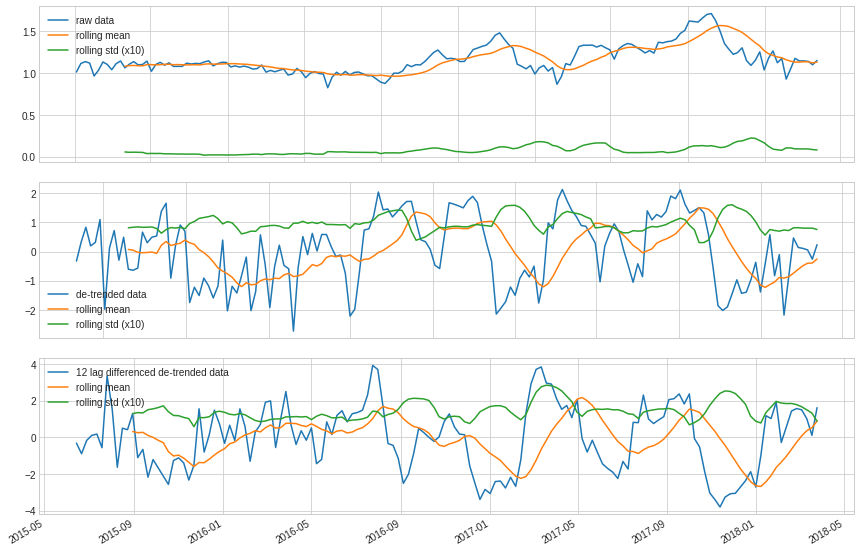

In [41]:
 plot_rolling(conv)

In [42]:
#Augmented Dickey-Fuller Test
print('> Is the data stationary ?')
dftest = adfuller(conv.AveragePrice, autolag='AIC')
print('Test statistic = {:.3f}'.format(dftest[0]))
print('P-value = {:.3f}'.format(dftest[1]))
print('Critical values :')
for k, v in dftest[4].items():
    print('\t{}: {} - The data {} stationary with {}% confidence'.format(k, v, 'is not' if v<dftest[0] else 'is', 100-int(k[:-1])))
    
print('\n > Is the de-trended data stationary ?')
dftest = adfuller(conv.z_data.dropna(), autolag='AIC')
print('Test statistic = {:.3f}'.format(dftest[0]))
print('P-value = {:.3f}'.format(dftest[1]))
print('Critical values :')
for k, v in dftest[4].items():
    print('\t{}: {} - The data {} stationary with {}% confidence'.format(k, v, 'is not' if v<dftest[0] else 'is', 100-int(k[:-1])))
    
print('\n > Is the 12-lag differenced de-trended data stationary ?')
dftest = adfuller(conv.zp_data.dropna(), autolag='AIC')
print('Test statistic = {:.3f}'.format(dftest[0]))
print('P-value = {:.3f}'.format(dftest[1]))
print('Critical values :')
for k, v in dftest[4].items():
    print('\t{}: {} - The data {} stationary with {}% confidence'.format(k, v, 'is not' if v<dftest[0] else 'is', 100-int(k[:-1])))

#I.e., is the test statistic less than the critical value?  If so, the data is stationary, if not it isn't.

> Is the data stationary ?
Test statistic = -2.097
P-value = 0.246
Critical values :
	1%: -3.4724305215713156 - The data is not stationary with 99% confidence
	5%: -2.8800127935315465 - The data is not stationary with 95% confidence
	10%: -2.576619230892485 - The data is not stationary with 90% confidence

 > Is the de-trended data stationary ?
Test statistic = -2.855
P-value = 0.051
Critical values :
	1%: -3.4759527332353084 - The data is not stationary with 99% confidence
	5%: -2.881548071241103 - The data is not stationary with 95% confidence
	10%: -2.577438765246763 - The data is stationary with 90% confidence

 > Is the 12-lag differenced de-trended data stationary ?
Test statistic = -3.041
P-value = 0.031
Critical values :
	1%: -3.480500383888377 - The data is not stationary with 99% confidence
	5%: -2.8835279559405045 - The data is stationary with 95% confidence
	10%: -2.578495716547007 - The data is stationary with 90% confidence


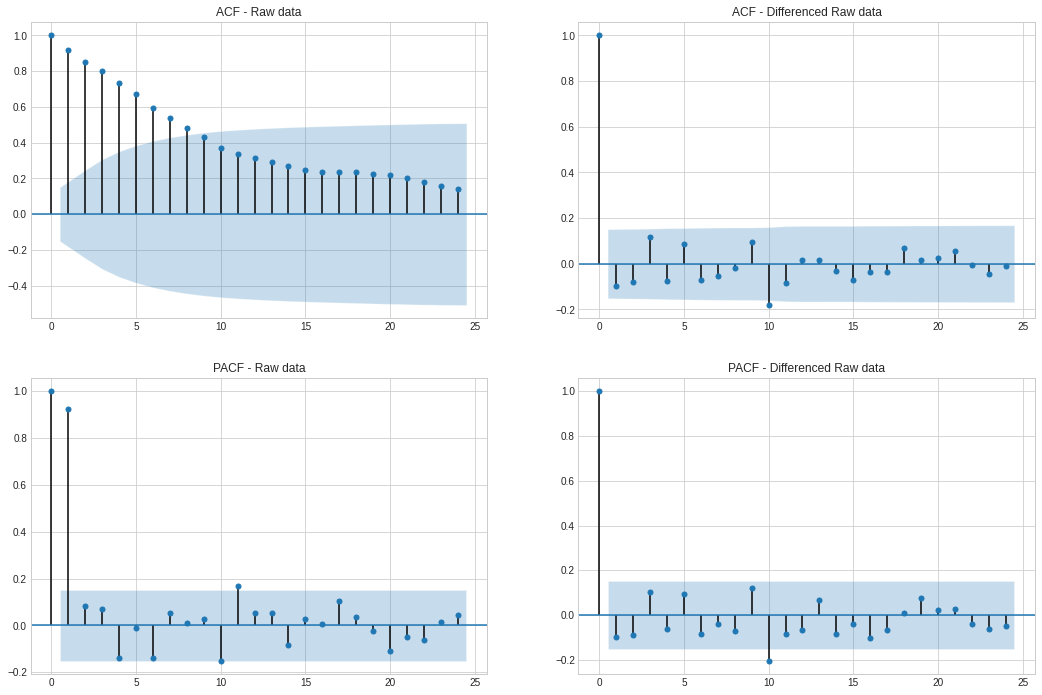

In [43]:
#SARIMA
fig, ax = plt.subplots(2, 2, figsize=(18,12))
first_diff = (conv.AveragePrice- conv.AveragePrice.shift()).dropna()
ax[0, 0] = plot_acf(conv.AveragePrice, ax=ax[0, 0], lags=24, title='ACF - Raw data')
ax[1, 0] = plot_pacf(conv.AveragePrice, ax=ax[1, 0], lags=24, title='PACF - Raw data')
ax[0, 1] = plot_acf(first_diff , ax=ax[0, 1], lags=24, title='ACF - Differenced Raw data')
ax[1, 1] = plot_pacf(first_diff, ax=ax[1, 1], lags=24, title='PACF - Differenced Raw data')

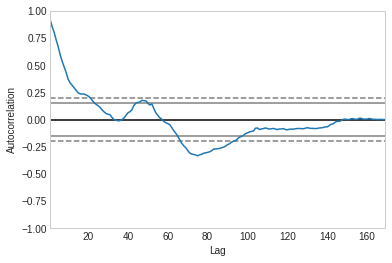

In [44]:
pd.plotting.autocorrelation_plot(conv['AveragePrice'])
plt.show()

In [45]:
#Use Auto Arima to find the best parameter
best=pm.auto_arima(conv.AveragePrice, start_q=0, start_p=0, d=1,m=52,seasonal= True, trace= True, D=1, error_action= 'warn', random_sate=20)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,1,1)[52]             : AIC=-284.267, Time=11.00 sec
 ARIMA(0,1,0)(0,1,0)[52]             : AIC=-283.527, Time=1.35 sec
 ARIMA(1,1,0)(1,1,0)[52]             : AIC=-284.147, Time=3.07 sec
 ARIMA(0,1,1)(0,1,1)[52]             : AIC=-283.779, Time=8.06 sec
 ARIMA(0,1,0)(0,1,1)[52]             : AIC=-285.654, Time=5.32 sec
 ARIMA(0,1,0)(0,1,2)[52]             : AIC=-284.267, Time=21.17 sec
 ARIMA(0,1,0)(1,1,0)[52]             : AIC=-286.041, Time=3.24 sec
 ARIMA(0,1,0)(2,1,0)[52]             : AIC=-284.267, Time=18.85 sec
 ARIMA(0,1,0)(2,1,1)[52]             : AIC=-282.267, Time=22.52 sec
 ARIMA(0,1,1)(1,1,0)[52]             : AIC=-284.134, Time=3.94 sec
 ARIMA(1,1,1)(1,1,0)[52]             : AIC=-283.749, Time=15.60 sec
 ARIMA(0,1,0)(1,1,0)[52] intercept   : AIC=-284.044, Time=5.91 sec

Best model:  ARIMA(0,1,0)(1,1,0)[52]          
Total fit time: 120.107 seconds


In [46]:
best.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  169
Model:             SARIMAX(0, 1, 0)x(1, 1, 0, 52)   Log Likelihood                 145.020
Date:                            Tue, 20 Apr 2021   AIC                           -286.041
Time:                                    18:32:43   BIC                           -280.533
Sample:                                         0   HQIC                          -283.805
                                            - 169                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L52      -0.2669      0.098     -2.731      0.006      -0.458      -0.075
sigma2         0.0046      0.001      7.860      0.000       0.003       0.006
===================================================================================
Ljung-Box (L1) (Q):                   0.10   Jarque-Bera (JB):                 3.16
Prob(Q):                              0.76   Prob(JB):                         0.21
Heteroskedasticity (H):               1.28   Skew:                            -0.34
Prob(H) (two-sided):                  0.45   Kurtosis:                         3.43
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [47]:
mod = sm.tsa.statespace.SARIMAX(conv.AveragePrice,
                                order=(0, 1, 0),
                                seasonal_order=(1, 1, 0, 52),
                                enforce_invertibility=False)

results = mod.fit()
print(results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                       AveragePrice   No. Observations:                  169
Model:             SARIMAX(0, 1, 0)x(1, 1, 0, 52)   Log Likelihood                 145.020
Date:                            Tue, 20 Apr 2021   AIC                           -286.041
Time:                                    18:32:46   BIC                           -280.533
Sample:                                01-04-2015   HQIC                          -283.805
                                     - 03-25-2018                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L52      -0.2669      0.098     -2.731      0.006      -0.458      -0.075
sigma2         0.0046      0.001   

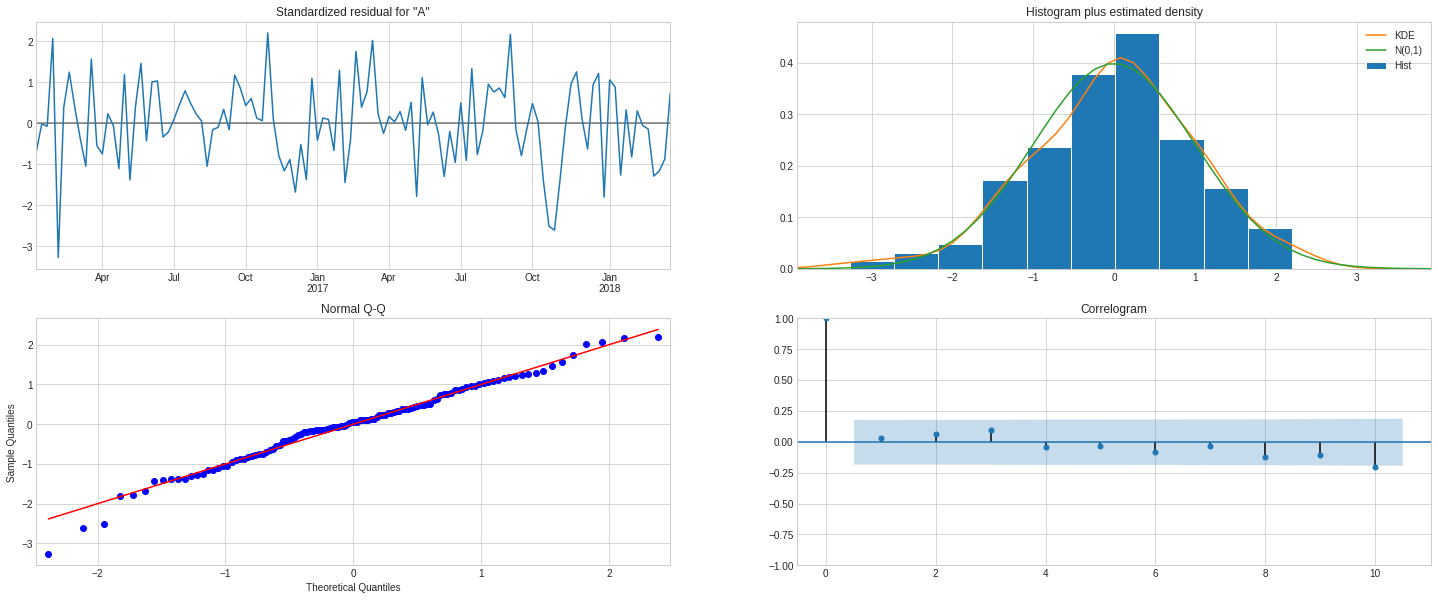

In [48]:
results.plot_diagnostics(figsize=(25, 10))
plt.show()

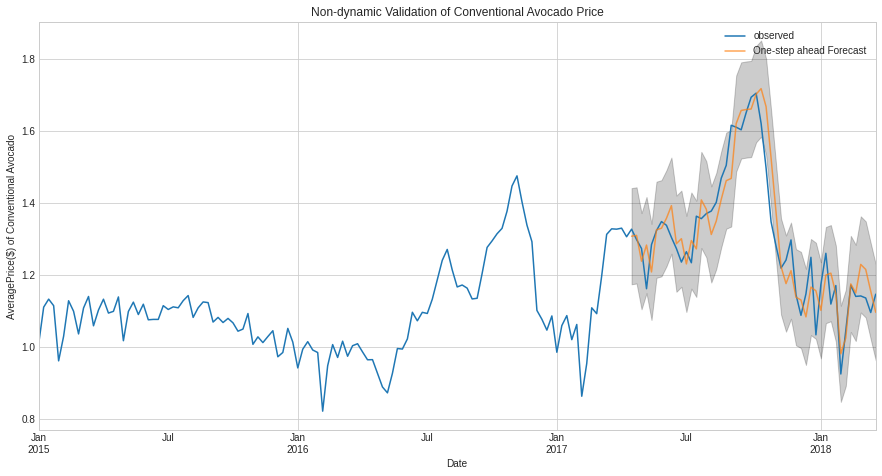

In [49]:
#Validation - not dynamic 
pred = results.get_prediction(start=pd.to_datetime('2017-04-16'), dynamic=False)
pred_ci = pred.conf_int()

ax = conv['AveragePrice'].plot(label='observed',figsize=(15, 7.5))
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('AveragePrice($) of Conventional Avocado')
ax.set_title('Non-dynamic Validation of Conventional Avocado Price')
plt.legend()

In [50]:
#Performance Criteria
y=conv['AveragePrice']
y_forecasted = pred.predicted_mean
y_truth = y['2017-04-16':]
# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 5)))

The Mean Squared Error of our forecasts is 0.00496


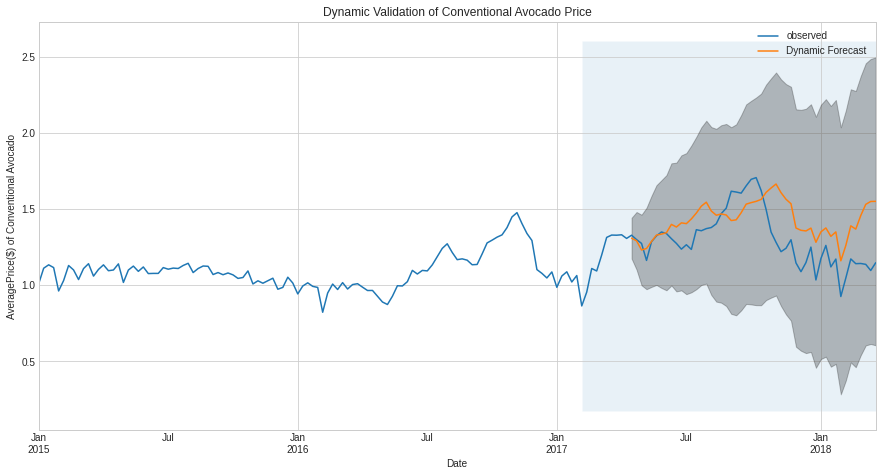

In [51]:
#Validation - dynamic 
pred_dynamic = results.get_prediction(start=pd.to_datetime('2017-04-16'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

ax = y.plot(label='observed', figsize=(15, 7.5))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], color='k', alpha=.25)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2017-01-31'), y.index[-1],
                 alpha=.1, zorder=-1)
ax.set_title('Dynamic Validation of Conventional Avocado Price')
ax.set_xlabel('Date')
ax.set_ylabel('AveragePrice($) of Conventional Avocado')

plt.legend()



In [52]:
#Performance Criteria
y_forecasted = pred_dynamic.predicted_mean
y_truth = y['2017-01-29':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 0.04


In [53]:
#Prepare for a forecast

# Get forecast 100 steps ahead in future
pred_uc = results.get_forecast(steps=100)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

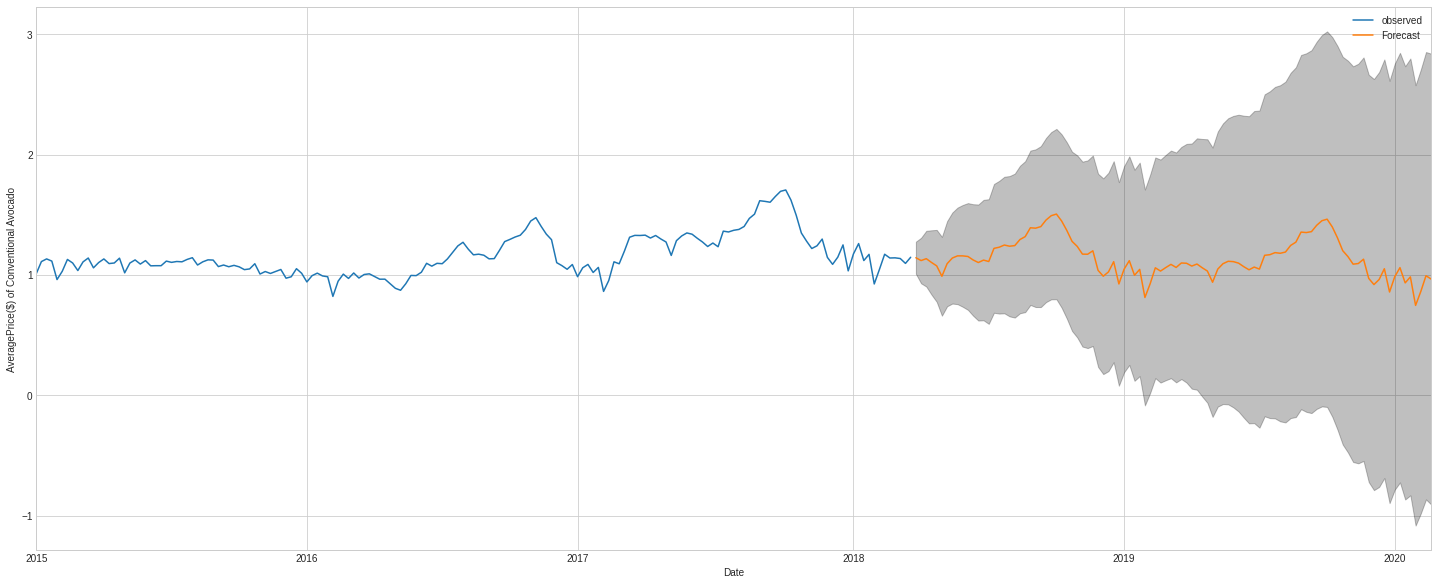

In [54]:
ax = y.plot(label='observed', figsize=(25, 10))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('AveragePrice($) of Conventional Avocado')

plt.legend()

In [55]:
prd_conv=pd.DataFrame(data=pred_uc.predicted_mean)

In [56]:
prd_conv

,predicted_mean
2018-04-01,1.143180
2018-04-08,1.119834
2018-04-15,1.135410
2018-04-22,1.104050
2018-04-29,1.075640
...,...
2020-01-26,0.984134
2020-02-02,0.747451
2020-02-09,0.862656
2020-02-16,0.993937


In [57]:
prd_conv=prd_conv.rename(columns={'predicted_mean':'Predicted_AveragePrice($)'})

#Organic Avocado Price Forecasting

In [58]:
org=org.set_index('Date')
org.sort_index(inplace= True)

In [59]:
#Average all region's weekly average price
org['AveragePrice'].groupby('Date').mean()

Date
2015-01-04    1.592963
2015-01-11    1.630000
2015-01-18    1.648704
2015-01-25    1.678889
2015-02-01    1.532037
                ...   
2018-02-25    1.578148
2018-03-04    1.557963
2018-03-11    1.533519
2018-03-18    1.531111
2018-03-25    1.546481
Name: AveragePrice, Length: 169, dtype: float64

In [60]:
org= pd.DataFrame(data=org['AveragePrice'].groupby('Date').mean(), columns=['AveragePrice'])
org.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 169 entries, 2015-01-04 to 2018-03-25
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  169 non-null    float64
dtypes: float64(1)
memory usage: 2.6 KB


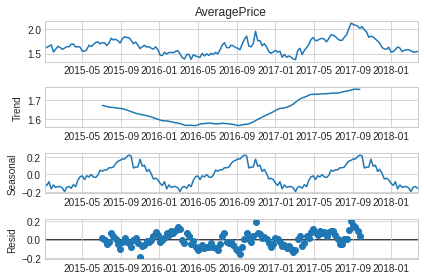

In [61]:
res = sm.tsa.seasonal_decompose(org.AveragePrice, model='additive')
resplot = res.plot()

In [62]:
#Checking Stationarity
#Plotting rolling means and variances
org['z_data'] = (org['AveragePrice'] - org.AveragePrice.rolling(window=12).mean()) / org.AveragePrice.rolling(window=12).std()
org['zp_data'] = org['z_data'] - org['z_data'].shift(12)

def plot_rolling(df):
    fig, ax = plt.subplots(3,figsize=(12, 9))
    ax[0].plot(org.index, org.AveragePrice, label='raw data')
    ax[0].plot(org.AveragePrice.rolling(window=12).mean(), label='rolling mean');
    ax[0].plot(org.AveragePrice.rolling(window=12).std(), label='rolling std (x10)');
    ax[0].legend()

    ax[1].plot(org.index, df.z_data, label='de-trended data')
    ax[1].plot(org.z_data.rolling(window=12).mean(), label='rolling mean');
    ax[1].plot(org.z_data.rolling(window=12).std(), label='rolling std (x10)');
    ax[1].legend()

    ax[2].plot(org.index, df.zp_data, label='12 lag differenced de-trended data')
    ax[2].plot(org.zp_data.rolling(window=12).mean(), label='rolling mean');
    ax[2].plot(org.zp_data.rolling(window=12).std(), label='rolling std (x10)');
    ax[2].legend()

    plt.tight_layout()
    fig.autofmt_xdate()

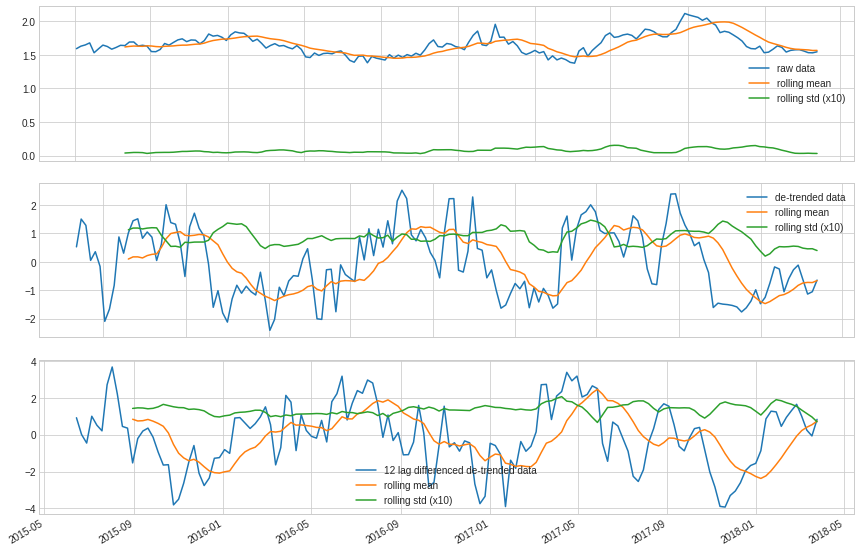

In [63]:
 plot_rolling(org)

In [64]:
#Augmented Dickey-Fuller Test
print('> Is the data stationary ?')
dftest = adfuller(org.AveragePrice, autolag='AIC')
print('Test statistic = {:.3f}'.format(dftest[0]))
print('P-value = {:.3f}'.format(dftest[1]))
print('Critical values :')
for k, v in dftest[4].items():
    print('\t{}: {} - The data {} stationary with {}% confidence'.format(k, v, 'is not' if v<dftest[0] else 'is', 100-int(k[:-1])))
    
print('\n > Is the de-trended data stationary ?')
dftest = adfuller(org.z_data.dropna(), autolag='AIC')
print('Test statistic = {:.3f}'.format(dftest[0]))
print('P-value = {:.3f}'.format(dftest[1]))
print('Critical values :')
for k, v in dftest[4].items():
    print('\t{}: {} - The data {} stationary with {}% confidence'.format(k, v, 'is not' if v<dftest[0] else 'is', 100-int(k[:-1])))
    
print('\n > Is the 12-lag differenced de-trended data stationary ?')
dftest = adfuller(org.zp_data.dropna(), autolag='AIC')
print('Test statistic = {:.3f}'.format(dftest[0]))
print('P-value = {:.3f}'.format(dftest[1]))
print('Critical values :')
for k, v in dftest[4].items():
    print('\t{}: {} - The data {} stationary with {}% confidence'.format(k, v, 'is not' if v<dftest[0] else 'is', 100-int(k[:-1])))

#I.e., is the test statistic less than the critical value?  If so, the data is stationary, if not it isn't.

> Is the data stationary ?
Test statistic = -3.268
P-value = 0.016
Critical values :
	1%: -3.472703119504854 - The data is not stationary with 99% confidence
	5%: -2.880131672353732 - The data is stationary with 95% confidence
	10%: -2.5766826861130268 - The data is stationary with 90% confidence

 > Is the de-trended data stationary ?
Test statistic = -3.282
P-value = 0.016
Critical values :
	1%: -3.4744158894942156 - The data is not stationary with 99% confidence
	5%: -2.880878382771059 - The data is stationary with 95% confidence
	10%: -2.577081275821236 - The data is stationary with 90% confidence

 > Is the 12-lag differenced de-trended data stationary ?
Test statistic = -2.998
P-value = 0.035
Critical values :
	1%: -3.480500383888377 - The data is not stationary with 99% confidence
	5%: -2.8835279559405045 - The data is stationary with 95% confidence
	10%: -2.578495716547007 - The data is stationary with 90% confidence


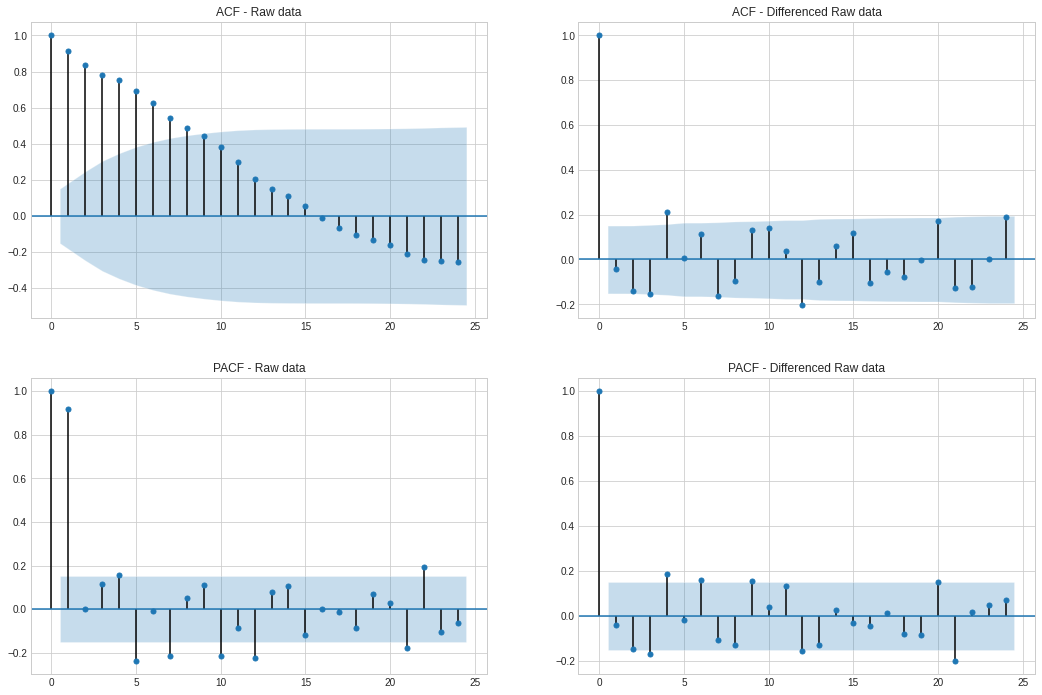

In [65]:
fig, ax = plt.subplots(2, 2, figsize=(18,12))
first_diff = (org.AveragePrice- org.AveragePrice.shift()).dropna()
ax[0, 0] = plot_acf(org.AveragePrice, ax=ax[0, 0], lags=24, title='ACF - Raw data')
ax[1, 0] = plot_pacf(org.AveragePrice, ax=ax[1, 0], lags=24, title='PACF - Raw data')
ax[0, 1] = plot_acf(first_diff , ax=ax[0, 1], lags=24, title='ACF - Differenced Raw data')
ax[1, 1] = plot_pacf(first_diff, ax=ax[1, 1], lags=24, title='PACF - Differenced Raw data')

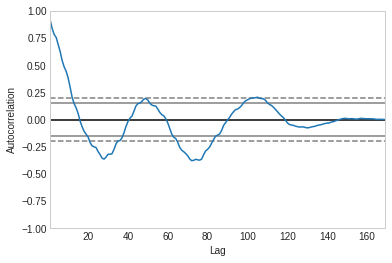

In [66]:
pd.plotting.autocorrelation_plot(org['AveragePrice'])
plt.show()

In [67]:
#Use Auto Arima to find the best parameter
best=pm.auto_arima(org.AveragePrice, start_q=0, start_p=0, d=None,m=52, max_P=1,seasonal= True, trace= True, D=1, error_action= 'warn', random_sate=20)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,1,1)[52]             : AIC=inf, Time=11.33 sec
 ARIMA(0,1,0)(0,1,0)[52]             : AIC=-203.988, Time=0.41 sec
 ARIMA(1,1,0)(1,1,0)[52]             : AIC=inf, Time=10.39 sec
 ARIMA(0,1,1)(0,1,1)[52]             : AIC=inf, Time=12.43 sec
 ARIMA(0,1,0)(1,1,0)[52]             : AIC=inf, Time=4.44 sec
 ARIMA(0,1,0)(0,1,1)[52]             : AIC=inf, Time=7.92 sec
 ARIMA(1,1,0)(0,1,0)[52]             : AIC=-202.103, Time=0.77 sec
 ARIMA(0,1,1)(0,1,0)[52]             : AIC=-202.258, Time=0.74 sec
 ARIMA(1,1,1)(0,1,0)[52]             : AIC=-209.384, Time=1.80 sec
 ARIMA(1,1,1)(1,1,0)[52]             : AIC=-245.721, Time=17.37 sec
 ARIMA(1,1,1)(1,1,1)[52]             : AIC=inf, Time=19.64 sec
 ARIMA(1,1,1)(0,1,1)[52]             : AIC=inf, Time=11.14 sec
 ARIMA(0,1,1)(1,1,0)[52]             : AIC=-241.431, Time=5.56 sec
 ARIMA(2,1,1)(1,1,0)[52]             : AIC=-244.679, Time=17.70 sec
 ARIMA(1,1,2)(1,1,0)[52]             : AIC=-244

In [68]:
best

ARIMA(maxiter=50, method='lbfgs', order=(1, 1, 1), out_of_sample_size=0,
      scoring='mse', scoring_args={}, seasonal_order=(1, 1, 0, 52),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=False)

In [69]:
mod = sm.tsa.statespace.SARIMAX(org.AveragePrice,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 52),
                                enforce_invertibility=False)

results = mod.fit()
print(results.summary())

                                      SARIMAX Results                                      
Dep. Variable:                        AveragePrice   No. Observations:                  169
Model:             SARIMAX(1, 1, 1)x(1, 1, [], 52)   Log Likelihood                 126.860
Date:                             Tue, 20 Apr 2021   AIC                           -245.721
Time:                                     18:36:27   BIC                           -234.706
Sample:                                 01-04-2015   HQIC                          -241.249
                                      - 03-25-2018                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7116      0.145      4.896      0.000       0.427       0.996
ma.L1         -1.1254      

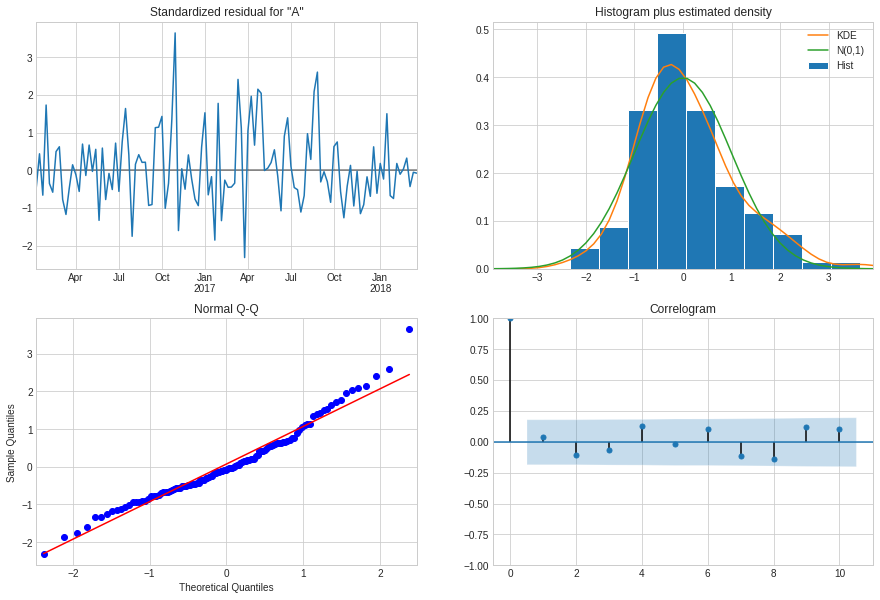

In [70]:
results.plot_diagnostics(figsize=(15, 10))
plt.show()

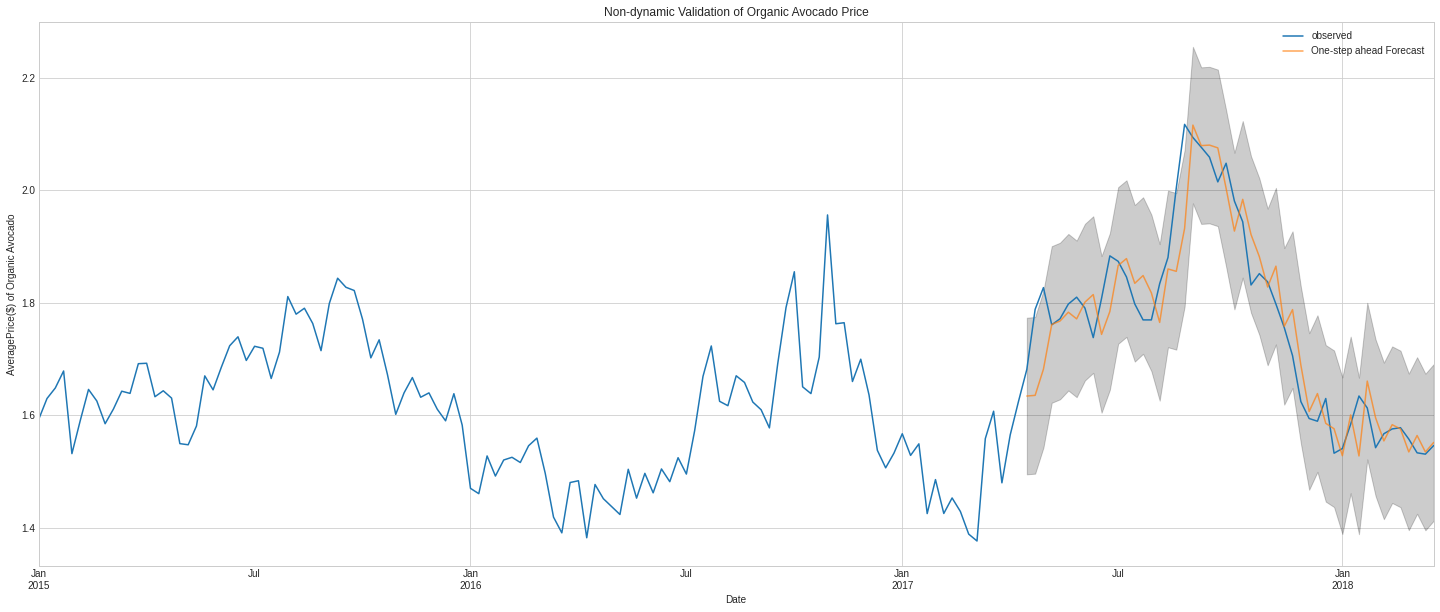

In [71]:
#Validation - not dynamic 
pred = results.get_prediction(start=pd.to_datetime('2017-04-16'), dynamic=False)
pred_ci = pred.conf_int()

ax = org['AveragePrice'].plot(label='observed',figsize=(25, 10))
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('AveragePrice($) of Organic Avocado')
ax.set_title('Non-dynamic Validation of Organic Avocado Price')
plt.legend()

In [72]:
#Performance Criteria
y=org['AveragePrice']
y_forecasted = pred.predicted_mean
y_truth = y['2017-04-16':]
# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 5)))

The Mean Squared Error of our forecasts is 0.00402


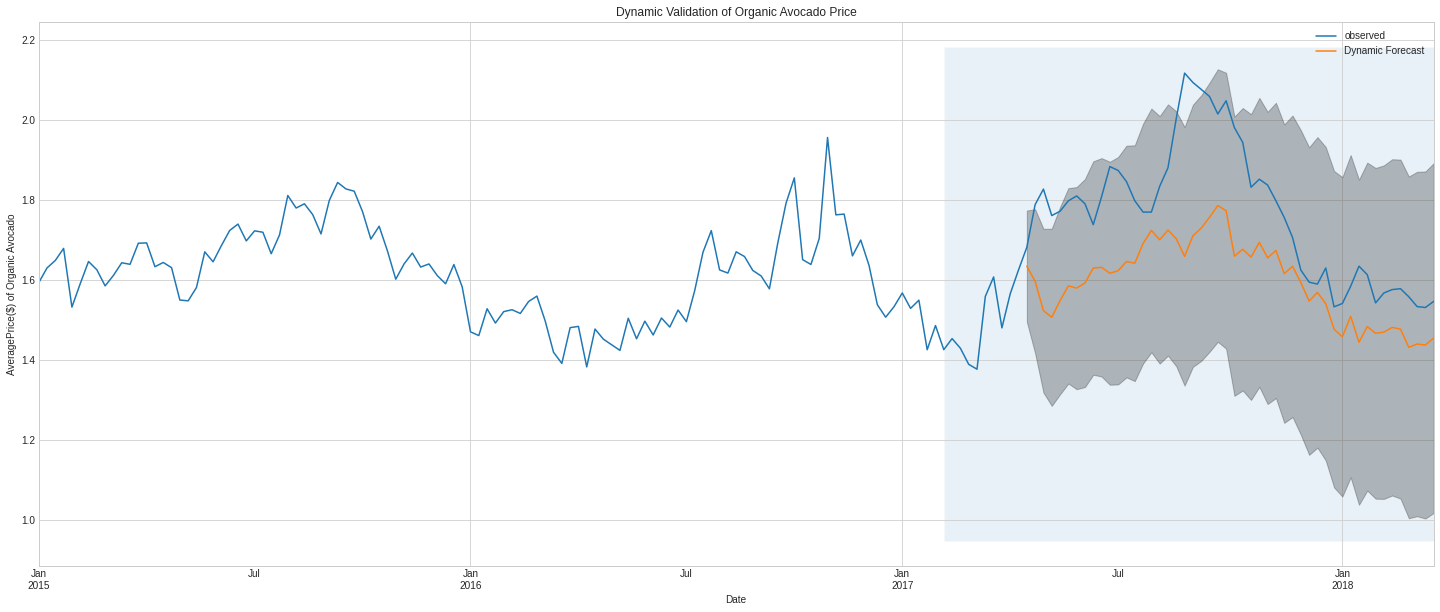

In [73]:
#Validation - dynamic 
pred_dynamic = results.get_prediction(start=pd.to_datetime('2017-04-16'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

ax = y.plot(label='observed', figsize=(25, 10))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], color='k', alpha=.25)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2017-01-31'), y.index[-1],
                 alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('AveragePrice($) of Organic Avocado')
ax.set_title('Dynamic Validation of Organic Avocado Price')
plt.legend()

In [74]:
#Performance Criteria
y_forecasted = pred_dynamic.predicted_mean
y_truth = y['2017-04-16':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 5)))

The Mean Squared Error of our forecasts is 0.03845


In [75]:
#Prepare for a forecast

# Get forecast 100 steps ahead in future
pred_uc = results.get_forecast(steps=100)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

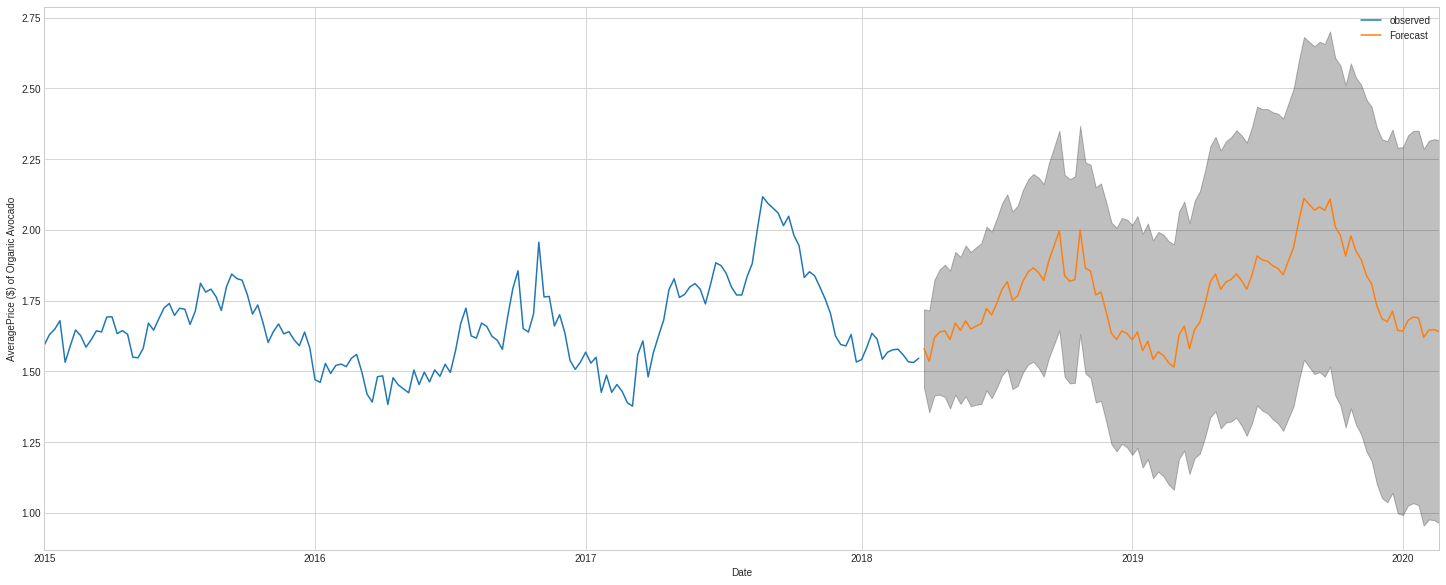

In [76]:
# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

ax = y.plot(label='observed', figsize=(25, 10))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('AveragePrice ($) of Organic Avocado')

plt.legend()

In [77]:
prd_org=pd.DataFrame(data=pred_uc.predicted_mean)

In [78]:
prd_org=prd_org.rename(columns={'predicted_mean':'Predicted_AveragePrice($)'})

# Time Series - Volume

In [79]:
#extract useful columns from dataset
df_Volume = pd.DataFrame(columns=['Date','Total_Volume','type'])
df_Volume['Date'] = df['Date']
df_Volume['Total_Volume'] = df['Total Volume']
df_Volume['type'] = df['type']
df_Volume.head()

,Date,Total_Volume,type
ID,,,
0,2015-12-27,64236.62,0
1,2015-12-20,54876.98,0
2,2015-12-13,118220.22,0
3,2015-12-06,78992.15,0
4,2015-11-29,51039.60,0


In [80]:
df_Volume['Date'] = pd.to_datetime(df_Volume['Date'], format = '%Y-%m-%d')

In [81]:
#Divide dataset by type
Conv = df_Volume[df_Volume['type']==0]
Org = df_Volume[df_Volume['type']==1]

# Conventional Avocado Volume Forcasting

In [82]:
#add time index
Conv = Conv.set_index('Date')
Conv.sort_index(inplace=True)

In [83]:
# Drop type column
Conv = Conv.drop(columns='type')
Conv.head()

,Total_Volume
Date,
2015-01-04,5777334.90
2015-01-04,407675.56
2015-01-04,3204112.16
2015-01-04,116253.44
2015-01-04,317861.35


In [84]:
#Average all region's weekly total average volume
Conv = pd.DataFrame(data=Conv['Total_Volume'].groupby('Date').mean(),columns=['Total_Volume'])
Conv.head()

,Total_Volume
Date,
2015-01-04,1.538052e+06
2015-01-11,1.421895e+06
2015-01-18,1.416863e+06
2015-01-25,1.389043e+06
2015-02-01,2.175782e+06


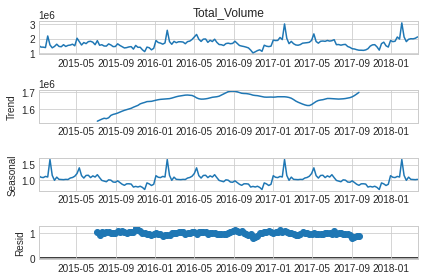

In [85]:
# decompose dataset
res = sm.tsa.seasonal_decompose(Conv['Total_Volume'], model='multiplicative')
resplot = res.plot()

In [86]:
#Checking Stationrity
Conv['z_data'] = (Conv['Total_Volume'] - Conv['Total_Volume'].rolling(window=12).mean()) / Conv['Total_Volume'].rolling(window=12).std()
Conv['zp_data'] = Conv['z_data'] - Conv['z_data'].shift(12)

def plot_rolling(Conv):
    fig, ax = plt.subplots(3,figsize=(12, 9))
    ax[0].plot(Conv.index, Conv['Total_Volume'], label='raw data')
    ax[0].plot(Conv['Total_Volume'].rolling(window=12).mean(), label='rolling mean');
    ax[0].plot(Conv['Total_Volume'].rolling(window=12).std(), label='rolling std (x10)');
    ax[0].legend()

    ax[1].plot(Conv.index, Conv.z_data, label='de-trended data')
    ax[1].plot(Conv.z_data.rolling(window=12).mean(), label='rolling mean');
    ax[1].plot(Conv.z_data.rolling(window=12).std(), label='rolling std (x10)');
    ax[1].legend()

    ax[2].plot(Conv.index, Conv.zp_data, label='12 lag differenced de-trended data')
    ax[2].plot(Conv.zp_data.rolling(window=12).mean(), label='rolling mean');
    ax[2].plot(Conv.zp_data.rolling(window=12).std(), label='rolling std (x10)');
    ax[2].legend()

    plt.tight_layout()
    fig.autofmt_xdate()

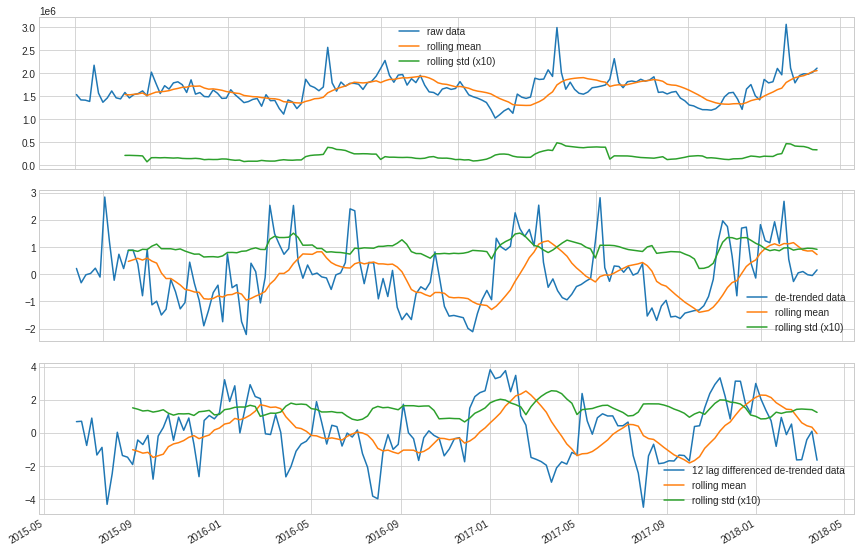

In [87]:
 plot_rolling(Conv)

In [88]:
#Augmented Dickey-Fuller Test
print(' > Is the data stationary ?')
dftest = adfuller(Conv['Total_Volume'] , autolag='AIC')
print('Test statistic = {:.3f}'.format(dftest[0]))
print('P-value = {:.3f}'.format(dftest[1]))
print('Critical values :')
for k, v in dftest[4].items():
    print('\t{}: {} - The data {} stationary with {}% confidence'.format(k, v, 'is not' if v<dftest[0] else 'is', 100-int(k[:-1])))
    
print('\n > Is the de-trended data stationary ?')
dftest = adfuller(Conv.z_data.dropna(), autolag='AIC')
print('Test statistic = {:.3f}'.format(dftest[0]))
print('P-value = {:.3f}'.format(dftest[1]))
print('Critical values :')
for k, v in dftest[4].items():
    print('\t{}: {} - The data {} stationary with {}% confidence'.format(k, v, 'is not' if v<dftest[0] else 'is', 100-int(k[:-1])))
    
print('\n > Is the 12-lag differenced de-trended data stationary ?')
dftest = adfuller(Conv.zp_data.dropna(), autolag='AIC')
print('Test statistic = {:.3f}'.format(dftest[0]))
print('P-value = {:.3f}'.format(dftest[1]))
print('Critical values :')
for k, v in dftest[4].items():
    print('\t{}: {} - The data {} stationary with {}% confidence'.format(k, v, 'is not' if v<dftest[0] else 'is', 100-int(k[:-1])))

 > Is the data stationary ?
Test statistic = -2.983
P-value = 0.036
Critical values :
	1%: -3.4732590518613002 - The data is not stationary with 99% confidence
	5%: -2.880374082105334 - The data is stationary with 95% confidence
	10%: -2.5768120811654525 - The data is stationary with 90% confidence

 > Is the de-trended data stationary ?
Test statistic = -4.399
P-value = 0.000
Critical values :
	1%: -3.4753253063120644 - The data is stationary with 99% confidence
	5%: -2.881274703275226 - The data is stationary with 95% confidence
	10%: -2.5772928360116873 - The data is stationary with 90% confidence

 > Is the 12-lag differenced de-trended data stationary ?
Test statistic = -2.865
P-value = 0.050
Critical values :
	1%: -3.480500383888377 - The data is not stationary with 99% confidence
	5%: -2.8835279559405045 - The data is not stationary with 95% confidence
	10%: -2.578495716547007 - The data is stationary with 90% confidence


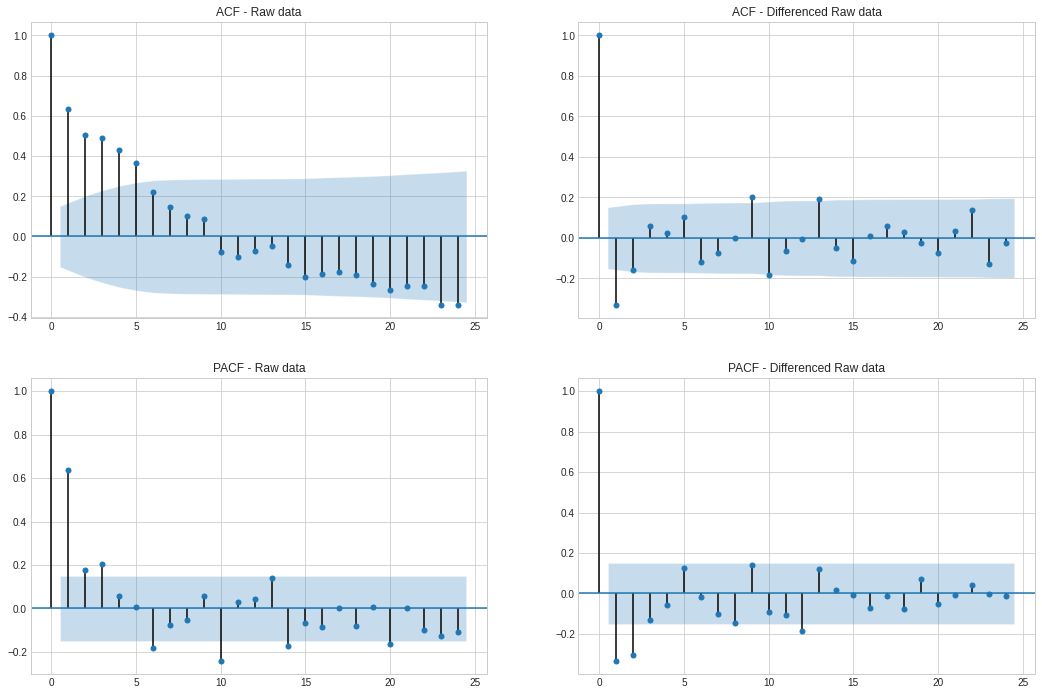

In [89]:
fig, ax = plt.subplots(2, 2, figsize=(18,12))
first_diff = (Conv['Total_Volume']- Conv['Total_Volume'].shift()).dropna()
ax[0, 0] = plot_acf(Conv['Total_Volume'], ax=ax[0, 0], lags=24, title='ACF - Raw data')
ax[1, 0] = plot_pacf(Conv['Total_Volume'], ax=ax[1, 0], lags=24, title='PACF - Raw data')
ax[0, 1] = plot_acf(first_diff , ax=ax[0, 1], lags=24, title='ACF - Differenced Raw data')
ax[1, 1] = plot_pacf(first_diff, ax=ax[1, 1], lags=24, title='PACF - Differenced Raw data')

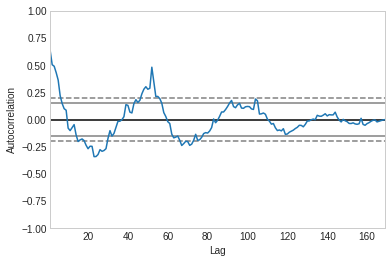

In [90]:
pd.plotting.autocorrelation_plot(Conv['Total_Volume'])
plt.show()

In [91]:
auto_model=pm.auto_arima(Conv['Total_Volume'], start_q=0, start_p=0, d=1,m=52, max_p=3, max_q=3,
                         seasonal= True, trace= True, D=1, error_action= 'warn', random_sate=20)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,1,1)[52]             : AIC=inf, Time=4.42 sec
 ARIMA(0,1,0)(0,1,0)[52]             : AIC=3189.960, Time=0.47 sec
 ARIMA(1,1,0)(1,1,0)[52]             : AIC=3156.334, Time=2.45 sec
 ARIMA(0,1,1)(0,1,1)[52]             : AIC=3152.824, Time=2.45 sec
 ARIMA(0,1,1)(0,1,0)[52]             : AIC=3163.999, Time=0.46 sec
 ARIMA(0,1,1)(1,1,1)[52]             : AIC=3154.605, Time=5.57 sec
 ARIMA(0,1,1)(0,1,2)[52]             : AIC=3154.661, Time=8.63 sec
 ARIMA(0,1,1)(1,1,0)[52]             : AIC=3154.159, Time=2.40 sec
 ARIMA(0,1,1)(1,1,2)[52]             : AIC=inf, Time=41.05 sec
 ARIMA(0,1,0)(0,1,1)[52]             : AIC=3174.315, Time=3.54 sec
 ARIMA(1,1,1)(0,1,1)[52]             : AIC=3154.566, Time=4.22 sec
 ARIMA(0,1,2)(0,1,1)[52]             : AIC=3174.368, Time=4.66 sec
 ARIMA(1,1,0)(0,1,1)[52]             : AIC=3155.161, Time=2.37 sec
 ARIMA(1,1,2)(0,1,1)[52]             : AIC=3176.266, Time=6.98 sec
 ARIMA(0,1,1)(0,1,1)[52] int

In [92]:
auto_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  169
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 52)   Log Likelihood               -1573.412
Date:                            Tue, 20 Apr 2021   AIC                           3152.824
Time:                                    18:38:09   BIC                           3161.085
Sample:                                         0   HQIC                          3156.177
                                            - 169                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.4314      0.039    -11.121      0.000      -0.507      -0.355
ma.S.L52      -0.2937      0.046     -6.378      0.000      -0.384      -0.203
sigma2      3.301e+10   6.77e-13   4.88e+22      0.000     3.3e+10     3.3e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.81   Jarque-Bera (JB):               381.66
Prob(Q):                              0.37   Prob(JB):                         0.00
Heteroskedasticity (H):               0.35   Skew:                             1.48
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.38
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.69e+37. Standard errors may be unstable.
"""

In [93]:
mod = sm.tsa.statespace.SARIMAX(Conv['Total_Volume'],
                                order=(2, 1, 0),
                                seasonal_order=(1, 1, 0, 52),
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                       Total_Volume   No. Observations:                  169
Model:             SARIMAX(2, 1, 0)x(1, 1, 0, 52)   Log Likelihood               -1573.673
Date:                            Tue, 20 Apr 2021   AIC                           3155.346
Time:                                    18:38:13   BIC                           3166.361
Sample:                                01-04-2015   HQIC                          3159.818
                                     - 03-25-2018                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4567      0.055     -8.360      0.000      -0.564      -0.350
ar.L2         -0.1515      0.070   

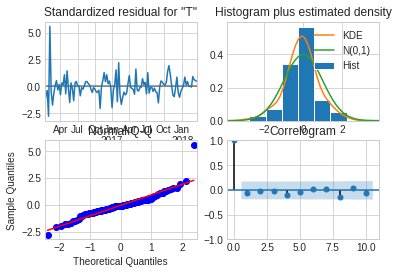

In [94]:
results.plot_diagnostics()
plt.show()

In [95]:
#Validation - not dynamic 
pred = results.get_prediction(start=pd.to_datetime('2017-04-16'), dynamic=False)
pred_ci = pred.conf_int()

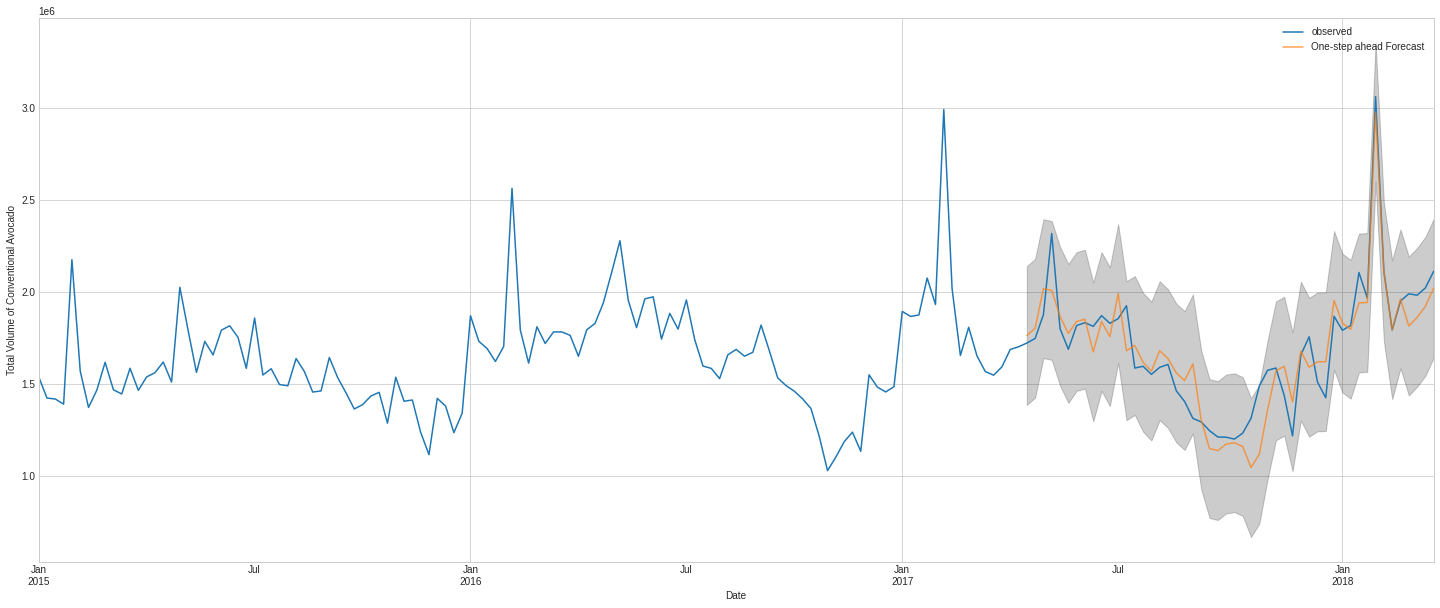

In [96]:
ax = Conv['Total_Volume'].plot(label='observed',figsize=(25, 10))
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Total Volume of Conventional Avocado')
plt.legend()

In [97]:
#Performance Criteria
y_forecasted = pred.predicted_mean
y=Conv['Total_Volume']
y_truth = y['2017-04-16':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 18005200403.08


In [98]:
#Validation using dynamic forecast
pred_dynamic = results.get_prediction(start=pd.to_datetime('2017-04-16'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

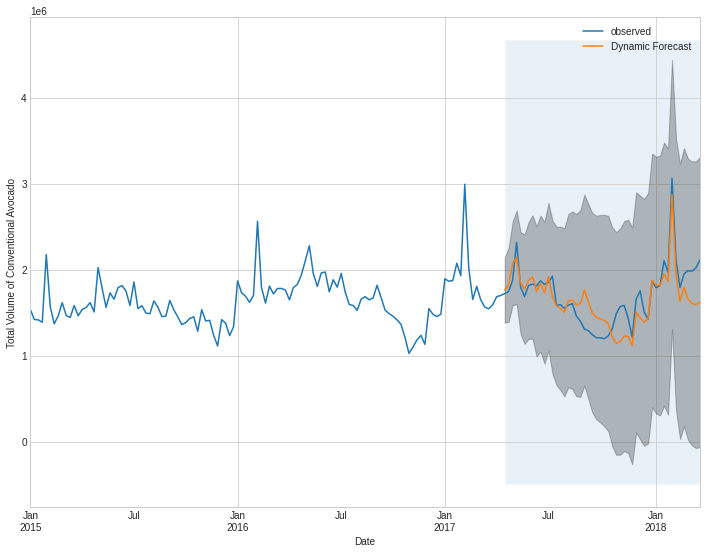

In [99]:
ax = y.plot(label='observed',figsize=(12, 9))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], color='k', alpha=.25)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2017-04-16'), y.index[-1],
                 alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('Total Volume of Conventional Avocado')

plt.legend()

In [100]:
#Performance Criteria
y_forecasted = pred_dynamic.predicted_mean
y_truth = y['2017-04-16':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 44548960938.53


In [101]:
#Prepare for a forecast

# Get forecast 500 steps ahead in future
pred_uc = results.get_forecast(steps=100)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

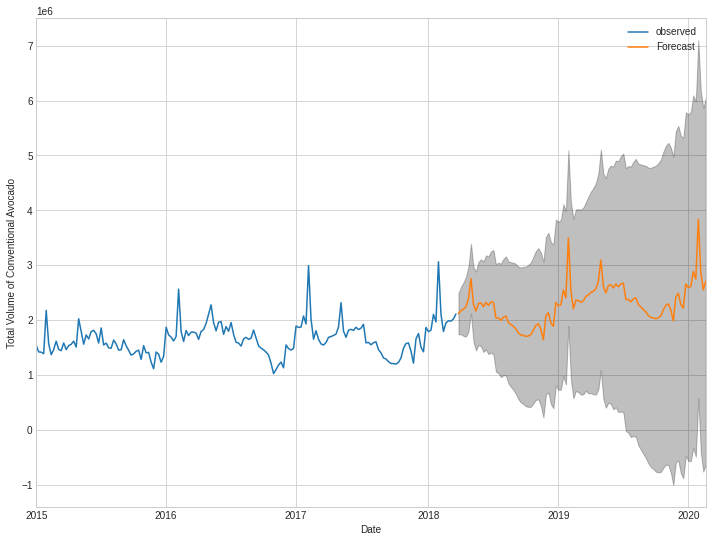

In [102]:
ax = y.plot(label='observed',figsize=(12, 9))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Total Volume of Conventional Avocado')

plt.legend()

In [103]:
prd_VC=pd.DataFrame(data=pred_uc.predicted_mean)

In [104]:
prd_VC=prd_VC.rename(columns={'predicted_mean':'Predicted_Volume'}) 

# Orangic Avocado Volume Foreasting

In [105]:
#Add time index
Org=Org.set_index('Date')
Org.sort_index(inplace= True)

In [106]:
#Drop type column
Org = Org.drop(columns='type')
Org.head()

,Total_Volume
Date,
2015-01-04,142349.77
2015-01-04,6329.83
2015-01-04,17296.85
2015-01-04,379.82
2015-01-04,5782.70


In [107]:
#Average all region's weekly total average volume
Org = pd.DataFrame(data=Org['Total_Volume'].groupby('Date').mean(),columns=['Total_Volume'])
Org.head()

,Total_Volume
Date,
2015-01-04,29991.439630
2015-01-11,32842.371296
2015-01-18,34781.294259
2015-01-25,26999.731667
2015-02-01,36314.965926


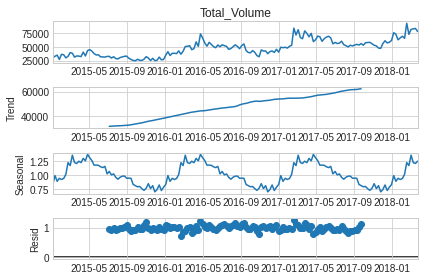

In [108]:
# decompose dataset
res = sm.tsa.seasonal_decompose(Org['Total_Volume'], model="multiplicative")
resplot = res.plot()

In [109]:
#Checking Stationrity
Org['z_data'] = (Org['Total_Volume'] - Org['Total_Volume'].rolling(window=12).mean()) / Org['Total_Volume'].rolling(window=12).std()
Org['zp_data'] = Org['z_data'] - Org['z_data'].shift(12)

def plot_rolling(Org):
    fig, ax = plt.subplots(3,figsize=(12, 9))
    ax[0].plot(Org.index, Org['Total_Volume'], label='raw data')
    ax[0].plot(Org['Total_Volume'].rolling(window=12).mean(), label='rolling mean');
    ax[0].plot(Org['Total_Volume'].rolling(window=12).std(), label='rolling std (x10)');
    ax[0].legend()

    ax[1].plot(Org.index, Org.z_data, label='de-trended data')
    ax[1].plot(Org.z_data.rolling(window=12).mean(), label='rolling mean');
    ax[1].plot(Org.z_data.rolling(window=12).std(), label='rolling std (x10)');
    ax[1].legend()

    ax[2].plot(Org.index, Org.zp_data, label='12 lag differenced de-trended data')
    ax[2].plot(Org.zp_data.rolling(window=12).mean(), label='rolling mean');
    ax[2].plot(Org.zp_data.rolling(window=12).std(), label='rolling std (x10)');
    ax[2].legend()

    plt.tight_layout()
    fig.autofmt_xdate()

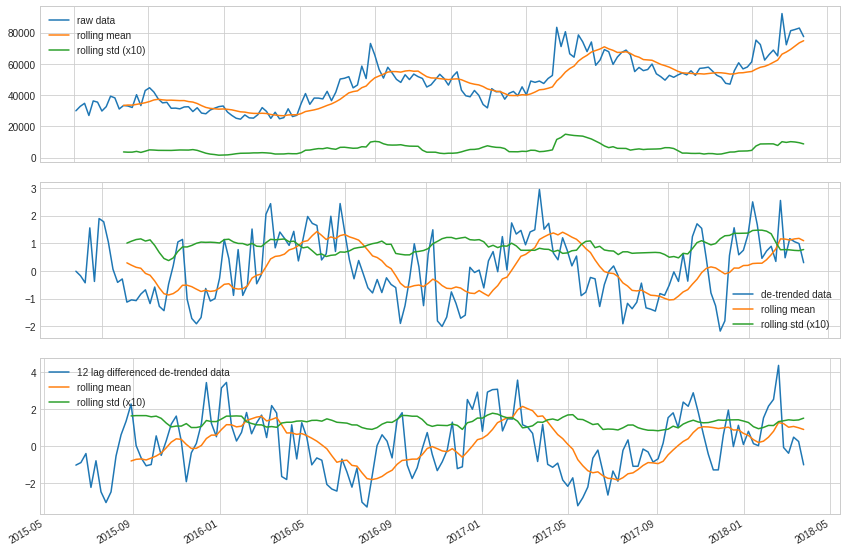

In [110]:
 plot_rolling(Org)

In [111]:
#Augmented Dickey-Fuller Test
print(' > Is the data stationary ?')
dftest = adfuller(Org['Total_Volume'] , autolag='AIC')
print('Test statistic = {:.3f}'.format(dftest[0]))
print('P-value = {:.3f}'.format(dftest[1]))
print('Critical values :')
for k, v in dftest[4].items():
    print('\t{}: {} - The data {} stationary with {}% confidence'.format(k, v, 'is not' if v<dftest[0] else 'is', 100-int(k[:-1])))
    
print('\n > Is the de-trended data stationary ?')
dftest = adfuller(Org.z_data.dropna(), autolag='AIC')
print('Test statistic = {:.3f}'.format(dftest[0]))
print('P-value = {:.3f}'.format(dftest[1]))
print('Critical values :')
for k, v in dftest[4].items():
    print('\t{}: {} - The data {} stationary with {}% confidence'.format(k, v, 'is not' if v<dftest[0] else 'is', 100-int(k[:-1])))
    
print('\n > Is the 12-lag differenced de-trended data stationary ?')
dftest = adfuller(Org.zp_data.dropna(), autolag='AIC')
print('Test statistic = {:.3f}'.format(dftest[0]))
print('P-value = {:.3f}'.format(dftest[1]))
print('Critical values :')
for k, v in dftest[4].items():
    print('\t{}: {} - The data {} stationary with {}% confidence'.format(k, v, 'is not' if v<dftest[0] else 'is', 100-int(k[:-1])))

 > Is the data stationary ?
Test statistic = -1.179
P-value = 0.683
Critical values :
	1%: -3.471374345647024 - The data is not stationary with 99% confidence
	5%: -2.8795521079291966 - The data is not stationary with 95% confidence
	10%: -2.5763733302850174 - The data is not stationary with 90% confidence

 > Is the de-trended data stationary ?
Test statistic = -5.844
P-value = 0.000
Critical values :
	1%: -3.472703119504854 - The data is stationary with 99% confidence
	5%: -2.880131672353732 - The data is stationary with 95% confidence
	10%: -2.5766826861130268 - The data is stationary with 90% confidence

 > Is the 12-lag differenced de-trended data stationary ?
Test statistic = -3.236
P-value = 0.018
Critical values :
	1%: -3.480500383888377 - The data is not stationary with 99% confidence
	5%: -2.8835279559405045 - The data is stationary with 95% confidence
	10%: -2.578495716547007 - The data is stationary with 90% confidence


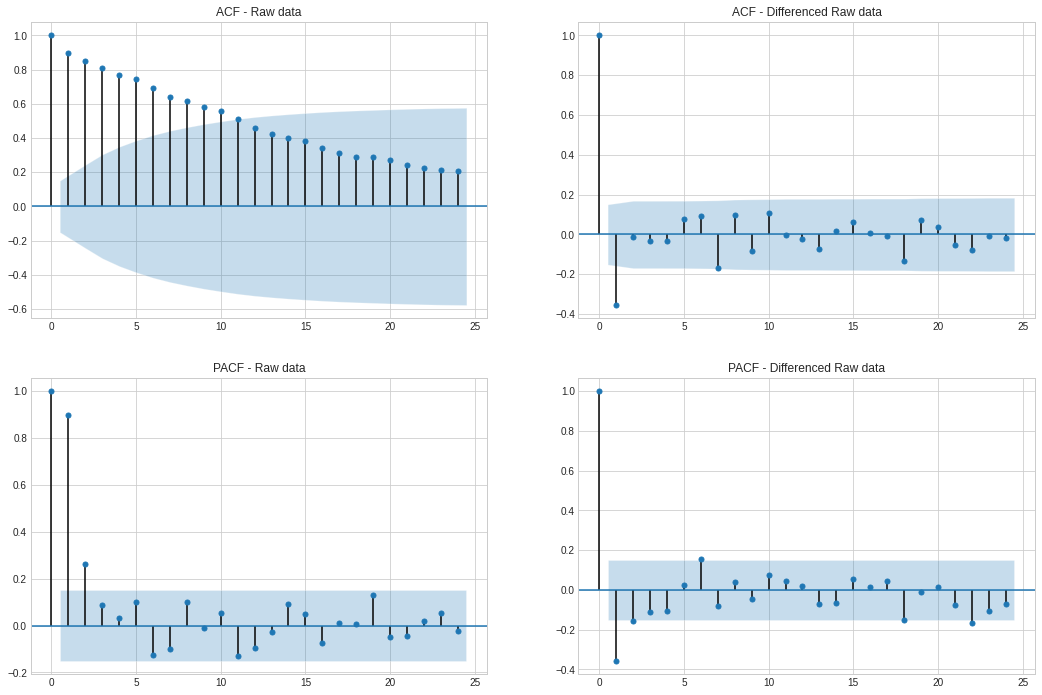

In [112]:
fig, ax = plt.subplots(2, 2, figsize=(18,12))
first_diff = (Org['Total_Volume']- Org['Total_Volume'].shift()).dropna()
ax[0, 0] = plot_acf(Org['Total_Volume'], ax=ax[0, 0], lags=24, title='ACF - Raw data')
ax[1, 0] = plot_pacf(Org['Total_Volume'], ax=ax[1, 0], lags=24, title='PACF - Raw data')
ax[0, 1] = plot_acf(first_diff , ax=ax[0, 1], lags=24, title='ACF - Differenced Raw data')
ax[1, 1] = plot_pacf(first_diff, ax=ax[1, 1], lags=24, title='PACF - Differenced Raw data')

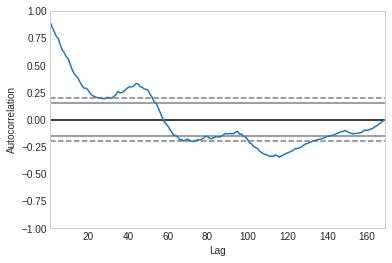

In [113]:
pd.plotting.autocorrelation_plot(Org['Total_Volume'])
plt.show()

In [114]:
auto_model=pm.auto_arima(Org['Total_Volume'], start_q=0, start_p=0, d=1,m=52, max_p=2, max_q=2,
                         seasonal= True, trace= True, D=1, error_action= 'warn', random_sate=20)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,1,1)[52]             : AIC=2418.135, Time=4.15 sec
 ARIMA(0,1,0)(0,1,0)[52]             : AIC=2440.923, Time=0.69 sec
 ARIMA(1,1,0)(1,1,0)[52]             : AIC=2410.929, Time=2.67 sec
 ARIMA(0,1,1)(0,1,1)[52]             : AIC=inf, Time=2.92 sec
 ARIMA(1,1,0)(0,1,0)[52]             : AIC=2433.781, Time=0.30 sec
 ARIMA(1,1,0)(2,1,0)[52]             : AIC=2405.686, Time=8.81 sec
 ARIMA(1,1,0)(2,1,1)[52]             : AIC=2407.682, Time=16.86 sec
 ARIMA(1,1,0)(1,1,1)[52]             : AIC=2406.812, Time=4.13 sec
 ARIMA(0,1,0)(2,1,0)[52]             : AIC=inf, Time=6.49 sec
 ARIMA(2,1,0)(2,1,0)[52]             : AIC=2400.232, Time=11.92 sec
 ARIMA(2,1,0)(1,1,0)[52]             : AIC=2405.896, Time=4.37 sec
 ARIMA(2,1,0)(2,1,1)[52]             : AIC=2402.219, Time=19.76 sec
 ARIMA(2,1,0)(1,1,1)[52]             : AIC=2401.489, Time=6.05 sec
 ARIMA(2,1,1)(2,1,0)[52]             : AIC=2394.523, Time=24.59 sec
 ARIMA(2,1,1)(1,1,0)[52] 

In [115]:
auto_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  169
Model:             SARIMAX(1, 1, 1)x(2, 1, [], 52)   Log Likelihood               -1187.684
Date:                             Tue, 20 Apr 2021   AIC                           2385.367
Time:                                     18:46:20   BIC                           2399.135
Sample:                                          0   HQIC                          2390.956
                                             - 169                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4490      0.117      3.823      0.000       0.219       0.679
ma.L1         -0.9306      0.036    -25.578      0.000      -1.002      -0.859
ar.S.L52      -0.6680      0.060    -11.196      0.000      -0.785      -0.551
ar.S.L104     -0.3885      0.083     -4.684      0.000      -0.551      -0.226
sigma2      4.131e+07   1.05e-09   3.94e+16      0.000    4.13e+07    4.13e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.35   Jarque-Bera (JB):               112.47
Prob(Q):                              0.56   Prob(JB):                         0.00
Heteroskedasticity (H):               1.03   Skew:                             0.80
Prob(H) (two-sided):                  0.93   Kurtosis:                         7.55
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.02e+32. Standard errors may be unstable.
"""

In [116]:
mod = sm.tsa.statespace.SARIMAX(Org['Total_Volume'],
                                order=(1, 1, 1),
                                seasonal_order=(2, 1, 0, 52),
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary())

                                      SARIMAX Results                                      
Dep. Variable:                        Total_Volume   No. Observations:                  169
Model:             SARIMAX(1, 1, 1)x(2, 1, [], 52)   Log Likelihood               -1192.054
Date:                             Tue, 20 Apr 2021   AIC                           2394.108
Time:                                     18:46:37   BIC                           2407.876
Sample:                                 01-04-2015   HQIC                          2399.697
                                      - 03-25-2018                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4235      0.194      2.179      0.029       0.043       0.804
ma.L1         -0.8960      

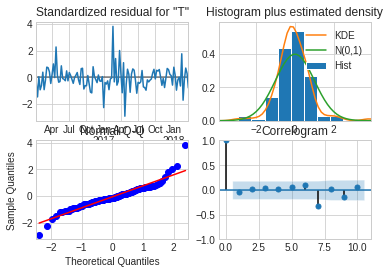

In [117]:
results.plot_diagnostics()
plt.show()

In [118]:
#Validation - not dynamic 
pred = results.get_prediction(start=pd.to_datetime('2017-04-16'), dynamic=False)
pred_ci = pred.conf_int()

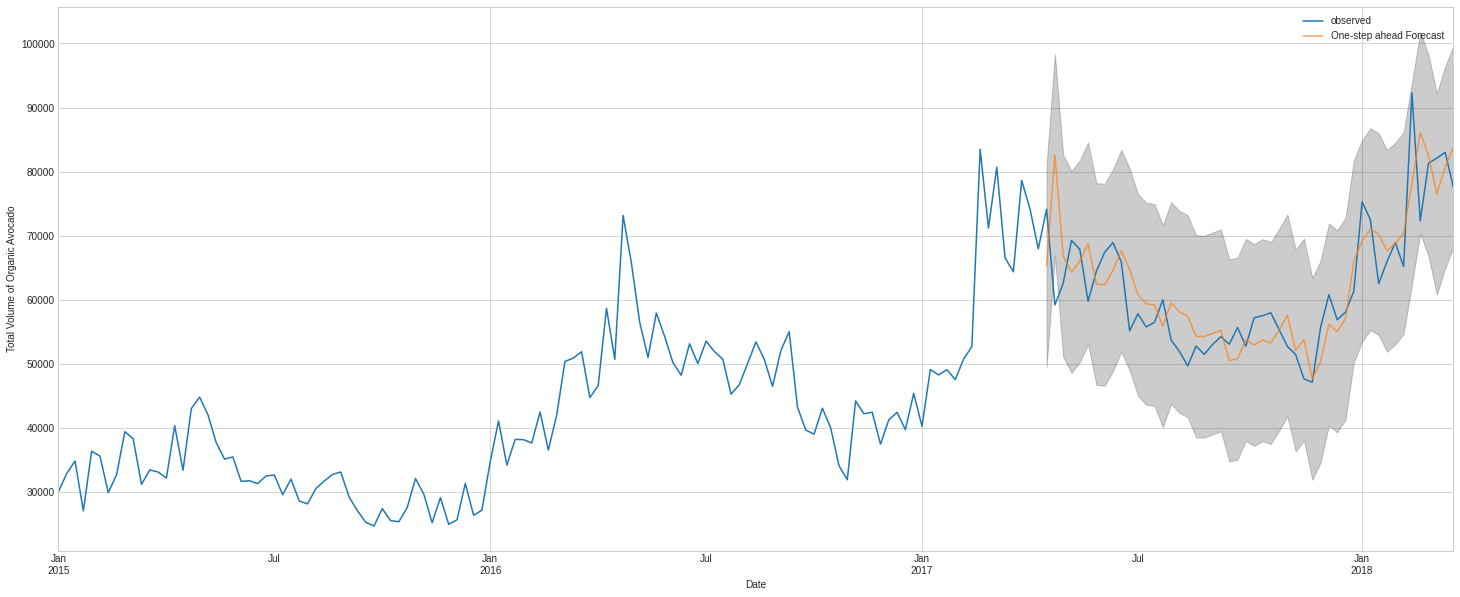

In [119]:
ax = Org['Total_Volume'].plot(label='observed',figsize=(25, 10))
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Total Volume of Organic Avocado')
plt.legend()

In [120]:
#Performance Criteria
y_forecasted = pred.predicted_mean
y=Org['Total_Volume']
y_truth = y['2017-04-16':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 38302254.99


In [121]:
#Validation using dynamic forecast
pred_dynamic = results.get_prediction(start=pd.to_datetime('2017-04-16'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

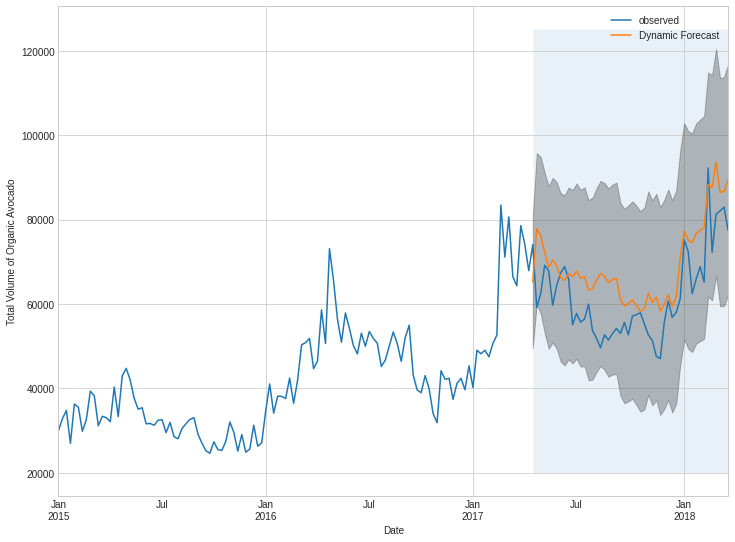

In [122]:
ax = y.plot(label='observed',figsize=(12, 9))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], color='k', alpha=.25)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2017-04-16'), y.index[-1],
                 alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('Total Volume of Organic Avocado')

plt.legend()

In [123]:
#Performance Criteria
y_forecasted = pred_dynamic.predicted_mean
y_truth = y['2017-04-16':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 88277643.67


In [124]:
#Prepare for a forecast

# Get forecast 500 steps ahead in future
pred_uc = results.get_forecast(steps=100)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

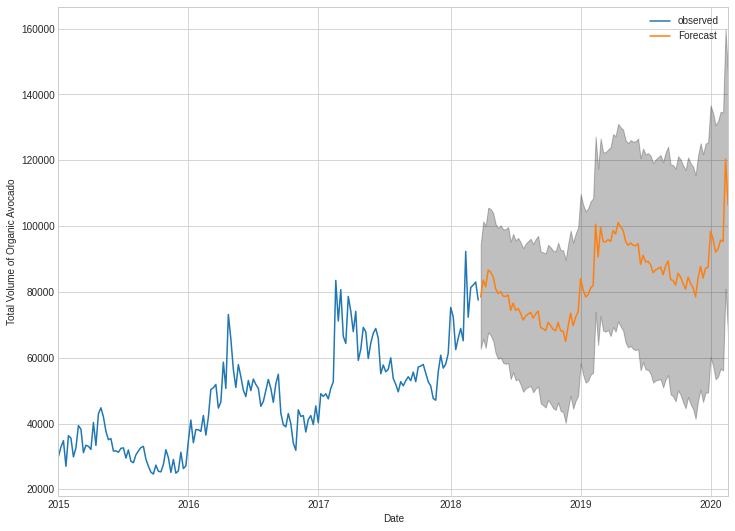

In [125]:
ax = y.plot(label='observed',figsize=(12, 9))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Total Volume of Organic Avocado')

plt.legend()

In [126]:
pred_uc.predicted_mean


2018-04-01     78476.330446
2018-04-08     83626.115425
2018-04-15     81560.376492
2018-04-22     86655.283164
2018-04-29     85997.830902
                  ...      
2020-01-26     93061.840899
2020-02-02     95726.907483
2020-02-09     95323.108937
2020-02-16    120410.906268
2020-02-23    106383.620923
Freq: W-SUN, Name: predicted_mean, Length: 100, dtype: float64

In [127]:
prd_VO=pd.DataFrame(data=pred_uc.predicted_mean)

In [128]:
prd_VO=prd_VO.rename(columns={'predicted_mean':'Predicted_Volume'}) 

In [129]:
prd_VO

,Predicted_Volume
2018-04-01,78476.330446
2018-04-08,83626.115425
2018-04-15,81560.376492
2018-04-22,86655.283164
2018-04-29,85997.830902
...,...
2020-01-26,93061.840899
2020-02-02,95726.907483
2020-02-09,95323.108937
2020-02-16,120410.906268


# Final Prediction for Conventional Avocado 2019

In [130]:
final_conv=prd_conv
final_conv

,Predicted_AveragePrice($)
2018-04-01,1.143180
2018-04-08,1.119834
2018-04-15,1.135410
2018-04-22,1.104050
2018-04-29,1.075640
...,...
2020-01-26,0.984134
2020-02-02,0.747451
2020-02-09,0.862656
2020-02-16,0.993937


In [131]:
final_conv['Predicted_Volume']=prd_VC['Predicted_Volume']
final_conv.head()

,Predicted_AveragePrice($),Predicted_Volume
2018-04-01,1.143180,2.118777e+06
2018-04-08,1.119834,2.173094e+06
2018-04-15,1.135410,2.199367e+06
2018-04-22,1.104050,2.244122e+06
2018-04-29,1.075640,2.383630e+06


In [132]:
final_conv=round(final_conv,2)
final_conv=final_conv['2018-12-30':'2020-01-05']
final_conv.head()

,Predicted_AveragePrice($),Predicted_Volume
2018-12-30,0.93,2323536.01
2019-01-06,1.05,2259566.58
2019-01-13,1.12,2280837.48
2019-01-20,1.00,2547688.63
2019-01-27,1.05,2407783.50


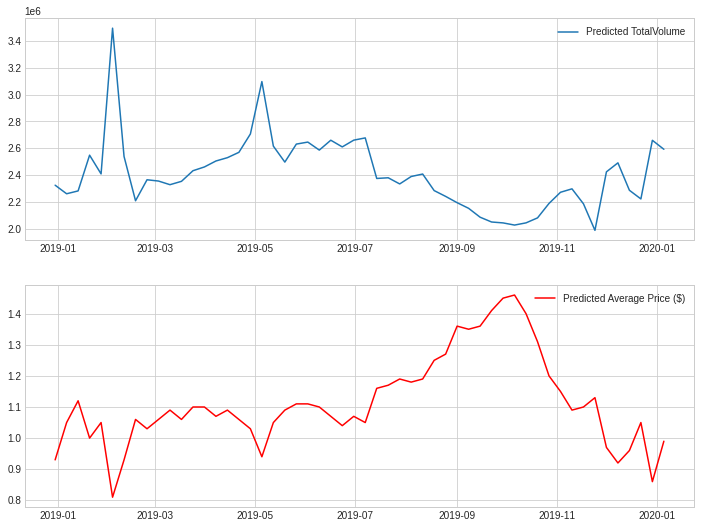

In [133]:
fig, ax = plt.subplots(2,figsize=(12, 9))
ax[0].plot(final_conv.index, final_conv['Predicted_Volume'], label='Predicted TotalVolume')
ax[0].legend()

ax[1].plot(final_conv.index, final_conv['Predicted_AveragePrice($)'], label='Predicted Average Price ($)', color= 'red')
ax[1].legend()

#Final Prediction for Organic Avocado 2019

In [134]:
final_org=prd_org


In [135]:
final_org['Predicted_Volume']=prd_VO['Predicted_Volume']
final_org.head()

,Predicted_AveragePrice($),Predicted_Volume
2018-04-01,1.580356,78476.330446
2018-04-08,1.535038,83626.115425
2018-04-15,1.618779,81560.376492
2018-04-22,1.638693,86655.283164
2018-04-29,1.643057,85997.830902


In [136]:
final_org=round(final_org,2)
final_org=final_org['2018-12-30':'2020-01-05']
final_org.head()

,Predicted_AveragePrice($),Predicted_Volume
2018-12-30,1.63,74021.04
2019-01-06,1.61,84020.88
2019-01-13,1.64,80664.00
2019-01-20,1.57,78452.70
2019-01-27,1.61,79198.16


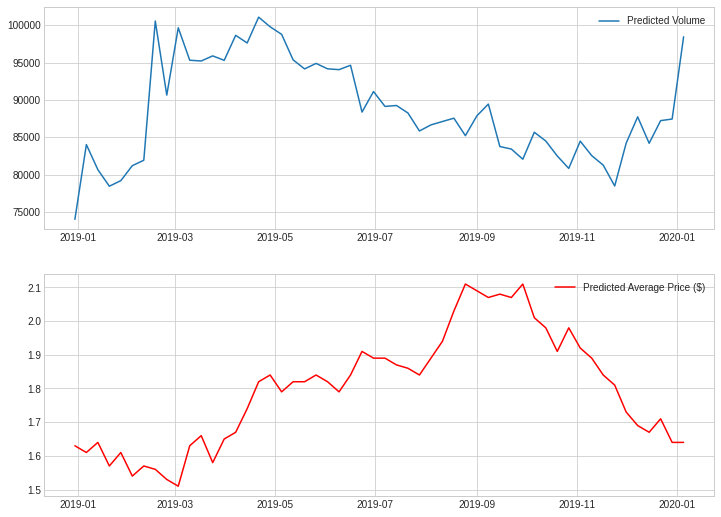

In [137]:
fig, ax = plt.subplots(2,figsize=(12, 9))
ax[0].plot(final_org.index, final_org['Predicted_Volume'], label='Predicted Volume')
ax[0].legend()

ax[1].plot(final_org.index, final_org['Predicted_AveragePrice($)'], label='Predicted Average Price ($)', color= 'red')
ax[1].legend()



#Forcasting for Both Types of Avocado 2019

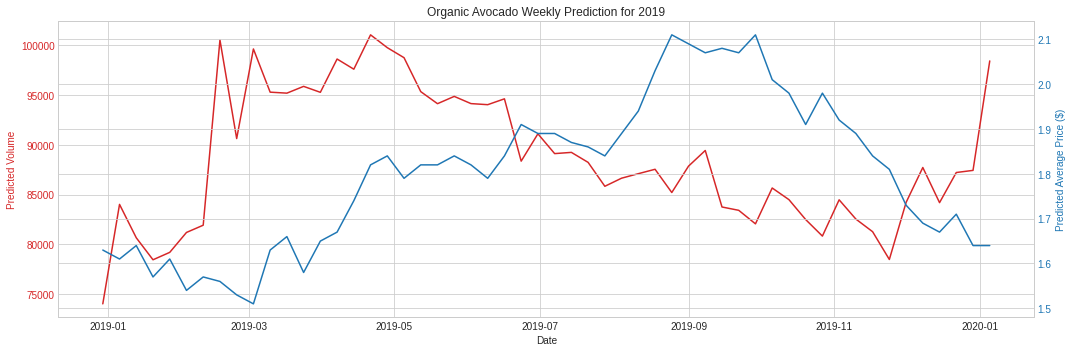

In [138]:
fig, ax1 = plt.subplots(figsize=(15, 5))
color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Predicted Volume', color=color)
ax1.plot(final_org.index, final_org['Predicted_Volume'], color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_title('Organic Avocado Weekly Prediction for 2019')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Predicted Average Price ($)', color=color)  # we already handled the x-label with ax1
ax2.plot(final_org.index, final_org['Predicted_AveragePrice($)'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

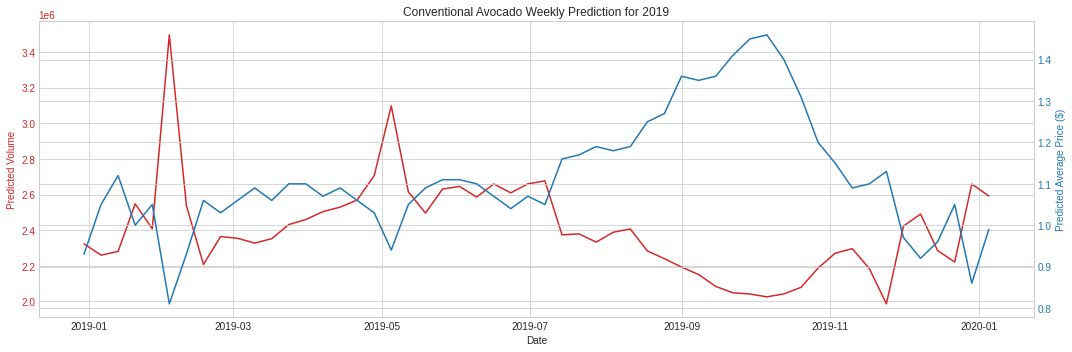

In [139]:
fig, ax1 = plt.subplots(figsize=(15, 5))
color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Predicted Volume', color=color)
ax1.plot(final_conv.index, final_conv['Predicted_Volume'], color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_title('Conventional Avocado Weekly Prediction for 2019')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Predicted Average Price ($)', color=color)  # we already handled the x-label with ax1
ax2.plot(final_conv.index, final_conv['Predicted_AveragePrice($)'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [140]:
#prepare monthly data
final_convm=final_conv.resample('1M').mean()
final_orgm=final_org.resample('1M').mean()

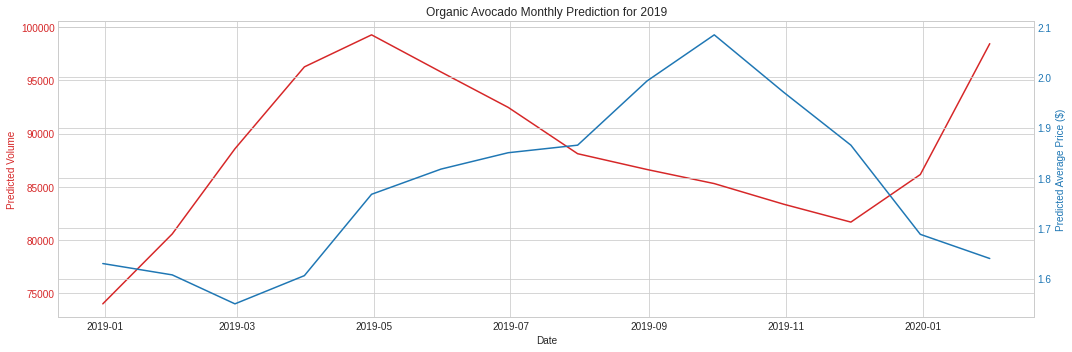

In [141]:
#Plot monthly graph of prediction
fig, ax1 = plt.subplots(figsize=(15, 5))
color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Predicted Volume', color=color)
ax1.plot(final_orgm.index, final_orgm['Predicted_Volume'], color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_title('Organic Avocado Monthly Prediction for 2019')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Predicted Average Price ($)', color=color)  # we already handled the x-label with ax1
ax2.plot(final_orgm.index, final_orgm['Predicted_AveragePrice($)'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

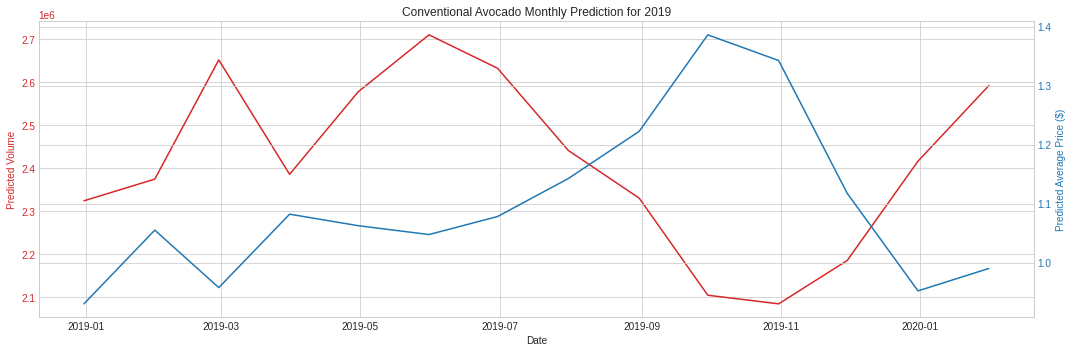

In [142]:
fig, ax1 = plt.subplots(figsize=(15, 5))
color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Predicted Volume', color=color)
ax1.plot(final_convm.index, final_convm['Predicted_Volume'], color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_title('Conventional Avocado Monthly Prediction for 2019')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Predicted Average Price ($)', color=color)  # we already handled the x-label with ax1
ax2.plot(final_convm.index, final_convm['Predicted_AveragePrice($)'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

**Summary:**

Descriptive analysis conclusions:

* 'Average price' shows a pretty normal distribution and looks tentative for the target variable for the regression model.

* It was observed from the dataset that the entries were done by weekly basis.The records were updated every seventh day of the week.

* It was also seen that year 2018 maintained records until first quarter.


Future analysis:

* Variable 'type' has two categories where both were balanced and could be used as a classifier in model building.

* Variable 'region' has 54 unique values and was perfectly balanced and could be hot encoded for model building.

* Units sold columns show similar data which is similarly distributed, log formulas could be used to increase model performance.

* Variable 'dates' are evenly distributed till 2018 and shows that the data was recorded on a weekly basis every Sunday.